## Exploratory Data Analysis

In [178]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statsmodels library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# displays floats with 2 decimal points
pd.options.display.float_format = '{:.2f}'.format

In [179]:
# load in dataset
df = pd.read_csv('./cleaned_kchd_V3.csv', index_col=0, parse_dates=['date'])

### First look at the data

In [180]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360 2022-05-24 675000.00         4       1.00         1180   
1  8910500230 2021-12-13 920000.00         5       2.50         2770   
2  1180000275 2021-09-29 311000.00         6       2.00         2880   
3  1604601802 2021-12-14 775000.00         3       3.00         2160   
4  8562780790 2021-08-24 592500.00         2       2.00         1120   

   sqft_lot  floors  waterfront greenbelt nuisance     view condition  \
0      7140    1.00           0        NO       NO     NONE      Good   
1      6703    1.00           0        NO      YES  AVERAGE   Average   
2      6156    1.00           0        NO       NO  AVERAGE   Average   
3      1400    2.00           0        NO       NO  AVERAGE   Average   
4       758    2.00           0        NO      YES     NONE   Average   

       grade  heat_source sewer_system  sqft_above  sqft_basement  \
0  7 Average          Gas       PUBLIC        1180              0   
1  7 Average          Oil       PUBLIC        1570           1570   
2  7 Average          Gas       PUBLIC        1580           1580   
3   9 Better          Gas       PUBLIC        1090           1070   
4  7 Average  Electricity       PUBLIC        1120            550   

   sqft_garage  sqft_patio  yr_built  yr_renovated  \
0            0          40      1969             0   
1            0         240      1950             0   
2            0           0      1956             0   
3          200         270      2010             0   
4          550          30      2012             0   

                                             address   lat    long  \
0  2102 Southeast 21st Court, Renton, Washington ... 47.46 -122.19   
1  11231 Greenwood Avenue North, Seattle, Washing... 47.71 -122.36   
2  8504 South 113th Street, Seattle, Washington 9... 47.50 -122.23   
3  4079 Letitia Avenue South, Seattle, Washington... 47.57 -122.29   
4  2193 Northwest Talus Drive, Issaquah, Washingt... 47.53 -122.07   

   logged_price  
0         13.42  
1         13.73  
2         12.65  
3         13.56  
4         13.29

In [181]:
df.iloc[:,:13].head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360 2022-05-24 675000.00         4       1.00         1180   
1  8910500230 2021-12-13 920000.00         5       2.50         2770   
2  1180000275 2021-09-29 311000.00         6       2.00         2880   
3  1604601802 2021-12-14 775000.00         3       3.00         2160   
4  8562780790 2021-08-24 592500.00         2       2.00         1120   

   sqft_lot  floors  waterfront greenbelt nuisance     view condition  
0      7140    1.00           0        NO       NO     NONE      Good  
1      6703    1.00           0        NO      YES  AVERAGE   Average  
2      6156    1.00           0        NO       NO  AVERAGE   Average  
3      1400    2.00           0        NO       NO  AVERAGE   Average  
4       758    2.00           0        NO      YES     NONE   Average

In [182]:
df.iloc[:,12:].head()

condition      grade  heat_source sewer_system  sqft_above  sqft_basement  \
0      Good  7 Average          Gas       PUBLIC        1180              0   
1   Average  7 Average          Oil       PUBLIC        1570           1570   
2   Average  7 Average          Gas       PUBLIC        1580           1580   
3   Average   9 Better          Gas       PUBLIC        1090           1070   
4   Average  7 Average  Electricity       PUBLIC        1120            550   

   sqft_garage  sqft_patio  yr_built  yr_renovated  \
0            0          40      1969             0   
1            0         240      1950             0   
2            0           0      1956             0   
3          200         270      2010             0   
4          550          30      2012             0   

                                             address   lat    long  \
0  2102 Southeast 21st Court, Renton, Washington ... 47.46 -122.19   
1  11231 Greenwood Avenue North, Seattle, Washing... 47.71 -122.36   
2  8504 South 113th Street, Seattle, Washington 9... 47.50 -122.23   
3  4079 Letitia Avenue South, Seattle, Washington... 47.57 -122.29   
4  2193 Northwest Talus Drive, Issaquah, Washingt... 47.53 -122.07   

   logged_price  
0         13.42  
1         13.73  
2         12.65  
3         13.56  
4         13.29

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  int64         
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [184]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
logged_price      0
dtype: int64

Drop null values from heat source and sewer system

In [185]:
df.dropna(subset=['heat_source', 'sewer_system'], inplace=True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30111 non-null  int64         
 1   date           30111 non-null  datetime64[ns]
 2   price          30111 non-null  float64       
 3   bedrooms       30111 non-null  int64         
 4   bathrooms      30111 non-null  float64       
 5   sqft_living    30111 non-null  int64         
 6   sqft_lot       30111 non-null  int64         
 7   floors         30111 non-null  float64       
 8   waterfront     30111 non-null  int64         
 9   greenbelt      30111 non-null  object        
 10  nuisance       30111 non-null  object        
 11  view           30111 non-null  object        
 12  condition      30111 non-null  object        
 13  grade          30111 non-null  object        
 14  heat_source    30111 non-null  object        
 15  sewer_system   3011

In [187]:
df['waterfront'].value_counts()

0    29600
1      511
Name: waterfront, dtype: int64

In [188]:
df['view'].value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [189]:
df['yr_renovated'].value_counts()

0       28743
2021       69
2006       49
2018       44
1990       42
2007       41
2004       41
2005       39
2016       39
2017       38
2019       35
2013       32
2002       31
2000       31
1989       29
2003       29
1999       29
2015       29
2014       29
2020       28
2008       28
2010       27
1994       26
2001       25
1998       24
1993       24
2012       22
2009       21
1992       21
1980       21
1985       21
1983       21
1984       21
1995       20
2011       20
1996       19
1991       19
1988       18
1982       17
1997       17
1986       16
1965       14
2022       13
1978       13
1987       13
1979       12
1970       11
1981        9
1956        9
1959        8
1960        8
1963        8
1968        8
1977        8
1961        7
1967        7
1955        6
1973        5
1969        5
1964        4
1957        4
1954        4
1940        3
1976        3
1958        3
1971        3
1974        3
1949        3
1952        3
1947        2
1975        2
1962  

It's possible a 0 value for yr_renovated means it has not been renovated. This could be useful in our model to see if a renovation has had a significant impact on the house price.

In [190]:
df.describe()

id       price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      30111.00    30111.00  30111.00   30111.00     30111.00   30111.00   
mean  4539171422.40  1108970.65      3.42       2.34      2113.34   16648.80   
std   2882235761.32   896515.83      0.98       0.89       973.45   59933.03   
min      1000055.00    27360.00      0.00       0.00         3.00     402.00   
25%   2070850032.50   649236.00      3.00       2.00      1420.00    4850.00   
50%   3876000200.00   860000.00      3.00       2.50      1920.00    7477.00   
75%   7287100141.00  1300000.00      4.00       3.00      2620.00   10568.00   
max   9904000012.00 30750000.00     13.00      10.50     15360.00 3253932.00   

        floors  waterfront  sqft_above  sqft_basement  sqft_garage  \
count 30111.00    30111.00    30111.00       30111.00     30111.00   
mean      1.54        0.02     1810.39         476.62       330.48   
std       0.57        0.13      877.73         579.81       285.73   
min       1.00        0.00        2.00           0.00         0.00   
25%       1.00        0.00     1180.00           0.00         0.00   
50%       1.50        0.00     1560.00           0.00       400.00   
75%       2.00        0.00     2270.00         940.00       510.00   
max       4.00        1.00    12660.00        8020.00      3580.00   

       sqft_patio  yr_built  yr_renovated      lat     long  logged_price  
count    30111.00  30111.00      30111.00 30111.00 30111.00      30111.00  
mean       217.45   1975.16         90.79    47.33  -121.32         13.74  
std        245.30     32.05        416.20     1.43     5.72          0.58  
min          0.00   1900.00          0.00    21.27  -157.79         10.22  
25%         40.00   1953.00          0.00    47.41  -122.33         13.38  
50%        150.00   1977.00          0.00    47.55  -122.23         13.66  
75%        320.00   2003.00          0.00    47.67  -122.12         14.08  
max       4370.00   2022.00       2022.00    64.82   -70.07         17.24

### Assigning Numbers to Categorical Columns

condition, view, and grade we can assign number values to. This will help with sorting and our regression later on. We are also going to convert yr_renovated into a YES or NO column. So if a house was renovated it will be YES if not it will say NO.

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30111 non-null  int64         
 1   date           30111 non-null  datetime64[ns]
 2   price          30111 non-null  float64       
 3   bedrooms       30111 non-null  int64         
 4   bathrooms      30111 non-null  float64       
 5   sqft_living    30111 non-null  int64         
 6   sqft_lot       30111 non-null  int64         
 7   floors         30111 non-null  float64       
 8   waterfront     30111 non-null  int64         
 9   greenbelt      30111 non-null  object        
 10  nuisance       30111 non-null  object        
 11  view           30111 non-null  object        
 12  condition      30111 non-null  object        
 13  grade          30111 non-null  object        
 14  heat_source    30111 non-null  object        
 15  sewer_system   3011

In [192]:
# taking a look at grade
df.grade.value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [193]:
# split grade into a list and assign the first value
# to the grade_num column
df['grade_num'] = df['grade'].str.split().str[0].astype(int)

In [194]:
# take a look at grade_num column
df['grade_num']

0         7
1         7
2         7
3         9
4         7
5         7
6         9
7         8
8         8
9         8
10        7
11        7
12        7
13        9
14        8
15        7
16        8
17        8
18        8
19        7
20        7
21        7
22        6
23        9
24        7
25        7
26        9
27        9
28        8
29        9
30        7
31        8
32        8
33        7
34        7
35       10
36        9
37        8
38        8
39       10
40        7
41        7
42        8
43        8
44        8
45        7
46        7
47        7
48        8
49        9
50        7
51        8
52        5
53        8
54        7
55        7
56        7
57        7
58        8
59        7
60        8
61        7
62        9
63        8
64        9
65        7
66        7
67        7
68        8
69        7
70        8
71        7
72        8
73        7
74        9
75        8
76        8
77        8
78        8
79        8
80        7
81        7
82        7
83  

In [195]:
# check out the final input
df[['grade', 'grade_num']].head(10)

grade  grade_num
0  7 Average          7
1  7 Average          7
2  7 Average          7
3   9 Better          9
4  7 Average          7
5  7 Average          7
6   9 Better          9
7     8 Good          8
8     8 Good          8
9     8 Good          8

Assigning a number value to grade was successful now assign value to condition.

In [196]:
# taking a look at condition
df.condition.value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

The order for condition it POOR, FAIR, AVERAGE, GOOD, VERY GOOD

In [197]:
# create a dictionary to assign numbers to the values
condition_dict = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

In [198]:
# take a look at condition column
df['condition']

0             Good
1          Average
2          Average
3          Average
4          Average
5          Average
6             Good
7          Average
8          Average
9          Average
10         Average
11       Very Good
12         Average
13         Average
14         Average
15            Good
16         Average
17         Average
18         Average
19         Average
20       Very Good
21            Good
22         Average
23         Average
24         Average
25         Average
26         Average
27            Good
28       Very Good
29         Average
30            Good
31         Average
32         Average
33         Average
34       Very Good
35            Good
36         Average
37         Average
38         Average
39         Average
40         Average
41            Good
42            Good
43         Average
44            Good
45            Good
46            Good
47            Good
48       Very Good
49         Average
50         Average
51         Average
52          

In [199]:
# create new column and assign to the map of condition using
# the dictionary we created
df['condition_num'] = df['condition'].map(condition_dict)

In [200]:
# check to see if it worked
df[['condition','condition_num']]

condition  condition_num
0           Good              4
1        Average              3
2        Average              3
3        Average              3
4        Average              3
5        Average              3
6           Good              4
7        Average              3
8        Average              3
9        Average              3
10       Average              3
11     Very Good              5
12       Average              3
13       Average              3
14       Average              3
15          Good              4
16       Average              3
17       Average              3
18       Average              3
19       Average              3
20     Very Good              5
21          Good              4
22       Average              3
23       Average              3
24       Average              3
25       Average              3
26       Average              3
27          Good              4
28     Very Good              5
29       Average              3
30          Good              4
31       Average              3
32       Average              3
33       Average              3
34     Very Good              5
35          Good              4
36       Average              3
37       Average              3
38       Average              3
39       Average              3
40       Average              3
41          Good              4
42          Good              4
43       Average              3
44          Good              4
45          Good              4
46          Good              4
47          Good              4
48     Very Good              5
49       Average              3
50       Average              3
51       Average              3
52          Fair              2
53       Average              3
54       Average              3
55       Average              3
56       Average              3
57          Good              4
58       Average              3
59       Average              3
60     Very Good              5
61       Average              3
62       Average              3
63       Average              3
64       Average              3
65          Good              4
66          Good              4
67       Average              3
68       Average              3
69          Good              4
70     Very Good              5
71       Average              3
72       Average              3
73       Average              3
74     Very Good              5
75       Average              3
76     Very Good              5
77       Average              3
78       Average              3
79       Average              3
80          Good              4
81     Very Good              5
82     Very Good              5
83       Average              3
84       Average              3
85          Good              4
86       Average              3
87       Average              3
88       Average              3
89       Average              3
90     Very Good              5
91       Average              3
92          Poor              1
93     Very Good              5
94          Good              4
95       Average              3
96          Fair              2
97       Average              3
98       Average              3
99       Average              3
100         Good              4
101      Average              3
102      Average              3
103      Average              3
104      Average              3
105         Good              4
106      Average              3
107         Good              4
108         Good              4
109         Good              4
110      Average              3
111      Average              3
112      Average              3
113      Average              3
114    Very Good              5
115      Average              3
116      Average              3
117    Very Good              5
118         Good              4
119      Average              3
120      Average              3
121      Average              3
122      Average              3
123         Good              4
124    

Condition column was assigned a numeric value now it is time to convert view to a numeric value

In [201]:
# taking a look at view
df.view.value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [202]:
# create a dictionary for the view values
view_dict = {
    "NONE": 1,
    "FAIR": 2,
    "AVERAGE": 3,
    "GOOD": 4,
    "EXCELLENT": 5
}

In [203]:
# creating a new view_num column with the values from dict
df['view_num'] = df['view'].map(view_dict)

In [204]:
# check to see if it worked
df[['view', 'view_num']].loc[df['view'] != "NONE"]

view  view_num
1        AVERAGE         3
2        AVERAGE         3
3        AVERAGE         3
6        AVERAGE         3
9        AVERAGE         3
35       AVERAGE         3
51     EXCELLENT         5
59          FAIR         2
64          FAIR         2
77       AVERAGE         3
79       AVERAGE         3
92       AVERAGE         3
109      AVERAGE         3
113      AVERAGE         3
131      AVERAGE         3
139         GOOD         4
144      AVERAGE         3
145      AVERAGE         3
147         GOOD         4
152      AVERAGE         3
157      AVERAGE         3
161    EXCELLENT         5
171      AVERAGE         3
180      AVERAGE         3
202    EXCELLENT         5
209      AVERAGE         3
219    EXCELLENT         5
224         FAIR         2
226         GOOD         4
234      AVERAGE         3
247    EXCELLENT         5
257         FAIR         2
261      AVERAGE         3
264      AVERAGE         3
279      AVERAGE         3
280      AVERAGE         3
285      AVERAGE         3
295      AVERAGE         3
300         GOOD         4
309    EXCELLENT         5
313      AVERAGE         3
321         GOOD         4
330         GOOD         4
334      AVERAGE         3
342      AVERAGE         3
355         GOOD         4
375      AVERAGE         3
377         GOOD         4
379    EXCELLENT         5
387      AVERAGE         3
391      AVERAGE         3
400      AVERAGE         3
411      AVERAGE         3
418      AVERAGE         3
422      AVERAGE         3
432      AVERAGE         3
439      AVERAGE         3
457      AVERAGE         3
459      AVERAGE         3
462      AVERAGE         3
466         GOOD         4
477      AVERAGE         3
479      AVERAGE         3
485      AVERAGE         3
506    EXCELLENT         5
513    EXCELLENT         5
525         FAIR         2
526      AVERAGE         3
529      AVERAGE         3
534    EXCELLENT         5
542         FAIR         2
543      AVERAGE         3
560         GOOD         4
570      AVERAGE         3
581         GOOD         4
607      AVERAGE         3
612      AVERAGE         3
614      AVERAGE         3
615    EXCELLENT         5
616      AVERAGE         3
621      AVERAGE         3
630    EXCELLENT         5
631         FAIR         2
638      AVERAGE         3
640      AVERAGE         3
647         GOOD         4
648         FAIR         2
658      AVERAGE         3
669         GOOD         4
688         FAIR         2
692         GOOD         4
697         GOOD         4
700      AVERAGE         3
708      AVERAGE         3
716      AVERAGE         3
718      AVERAGE         3
736      AVERAGE         3
739    EXCELLENT         5
744      AVERAGE         3
761      AVERAGE         3
762      AVERAGE         3
772      AVERAGE         3
775         GOOD         4
778         GOOD         4
780         FAIR         2
790      AVERAGE         3
805         FAIR         2
837      AVERAGE         3
838      AVERAGE         3
843      AVERAGE         3
844      AVERAGE         3
845    EXCELLENT         5
854    EXCELLENT         5
857      AVERAGE         3
858      AVERAGE         3
863         FAIR         2
871      AVERAGE         3
876         FAIR         2
887         GOOD         4
890      AVERAGE         3
899      AVERAGE         3
900      AVERAGE         3
904    EXCELLENT         5
910    EXCELLENT         5
926      AVERAGE         3
927      AVERAGE         3
936      AVERAGE         3
943         GOOD         4
970         GOOD         4
1001     AVERAGE         3
1002     AVERAGE         3
1021     AVERAGE         3
1022     AVERAGE         3
1023   EXCELLENT         5
1051     AVERAGE         3
1053        GOOD         4
1076     AVERAGE         3
1082     AVERAGE         3
1085        GOOD         4
1086     AVERAGE         3
1091        GOOD         4
1093     AVERAGE         3
1094        GOOD         4
1101     AVERAGE         3
1108     AVERAGE         3
1115     AVERAGE         3
1121     AVERAGE         3
1128     AVERAGE

Now it is time to convert yr_renovated into a YES or NO column if the home was renovated after 2009

In [205]:
df['yr_renovated_yes_or_no'] = df['yr_renovated'].map(lambda x: 1 if x >= 2010 else 0)

In [206]:
df[['yr_renovated', 'yr_renovated_yes_or_no']].loc[df['yr_renovated'] != 0]

yr_renovated  yr_renovated_yes_or_no
24             2005                       0
36             1995                       0
40             2008                       0
42             1978                       0
51             2015                       1
91             1992                       0
98             1990                       0
103            2004                       0
115            2019                       1
139            1998                       0
142            2007                       0
171            1979                       0
191            2011                       1
199            2014                       1
207            1994                       0
226            1983                       0
252            1970                       0
257            1996                       0
302            2017                       1
328            2017                       1
336            2017                       1
356            1954                       0
363            2014                       1
365            2018                       1
389            2019                       1
399            1989                       0
401            2018                       1
411            1982                       0
435            2014                       1
438            2006                       0
439            2002                       0
447            2007                       0
448            1989                       0
466            2011                       1
476            2004                       0
486            1994                       0
509            1996                       0
513            2013                       1
518            2013                       1
542            2017                       1
556            2003                       0
579            1988                       0
588            2018                       1
592            2003                       0
607            2000                       0
631            1990                       0
633            2017                       1
656            2016                       1
657            2021                       1
805            2015                       1
813            1971                       0
827            1988                       0
863            1984                       0
871            1993                       0
898            2001                       0
910            2006                       0
1020           2006                       0
1023           1965                       0
1024           1995                       0
1045           1993                       0
1061           1967                       0
1082           2005                       0
1085           1981                       0
1093           1963                       0
1101           2018                       1
1132           1987                       0
1147           1985                       0
1178           1991                       0
1184           1997                       0
1188           2013                       1
1210           2017                       1
1240           1955                       0
1257           1985                       0
1292           1989                       0
1293           2002                       0
1375           2012                       1
1379           2002                       0
1384           2002                       0
1409           2002                       0
1410           1986                       0
1419           1991                       0
1441           2006                       0
1444           2001                       0
1533           1999                       0
1560           1993                       0
1642           2010                       1
1660           1956                       0
1738           1982                       0
1754           1986                       0
1778           1991                       0
180

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      30111 non-null  int64         
 1   date                    30111 non-null  datetime64[ns]
 2   price                   30111 non-null  float64       
 3   bedrooms                30111 non-null  int64         
 4   bathrooms               30111 non-null  float64       
 5   sqft_living             30111 non-null  int64         
 6   sqft_lot                30111 non-null  int64         
 7   floors                  30111 non-null  float64       
 8   waterfront              30111 non-null  int64         
 9   greenbelt               30111 non-null  object        
 10  nuisance                30111 non-null  object        
 11  view                    30111 non-null  object        
 12  condition               30111 non-null  object

### Extracting zipcode from address

In [208]:
df['address'].iloc[4]

'2193 Northwest Talus Drive, Issaquah, Washington 98027, United States'

In [209]:
# take the 5 numbers for the zipcode
df['zipcode'] = df.address.str[-20:-15]

In [210]:
df['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '68106', '98092', '98103',
       '98006', '98136', '98007', '98038', '98057', '98077', '98126',
       '98053', '98039', '98107', '98008', '98155', '98168', '98199',
       '98004', '98045', '98052', '98011', '98002', '98033', '98116',
       '08360', '98198', '98125', '98001', '62859', '98112', '98034',
       '98056', '98059', '98005', '98040', '98014', '98106', '98029',
       '98122', '98003', '98117', '98042', '98119', '98065', '98022',
       '98072', '98058', '98108', '98115', '98074', '98105', '98024',
       '07087', '98146', '11704', '68123', '98109', '98102', '52405',
       '02066', '80501', '91343', '19131', '98028', '98188', '55417',
       '98177', '98075', '98010', '98148', '53158', '98047', '15120',
       '98032', '97210', '98070', '11105', '91730', '68410', '58490',
       '68048', '62703', '68601', '61108', '96816', '47060', '48503',
       '55901', '117

A problem here is there are many zipcodes contained in the dataset that do not belong in King County, Washington. We have to filter out the zipcodes not belonging to King County. We searched the internet to find all the zipcodes for King County and created an Excel spreadsheet containing all the zipcodes. We will use this to filter our data frame.

In [211]:
# example of an address in our dataframe containing Washington
df.loc[df['address'].str.contains(', Washington')]['address'].iloc[0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [212]:
# example of an address in our dataframe containing Washington
# and zipcode starts with 98
df.loc[df['address'].str.contains('Washington 98')]['zipcode']\
.value_counts()

98042    992
98038    857
98103    761
98115    760
98117    748
98023    695
98034    689
98058    682
98133    664
98001    623
98092    609
98033    608
98118    600
98059    583
98052    568
98106    543
98031    530
98006    526
98056    520
98155    515
98125    489
98045    466
98107    458
98022    457
98126    440
98003    440
98122    440
98144    439
98146    428
98074    427
98198    425
98075    411
98199    410
98008    397
98053    393
98116    387
98168    383
98178    383
98027    382
98030    377
98002    363
98028    349
98040    349
98166    344
98072    343
98105    330
98004    322
98029    321
98010    314
98112    307
98108    305
98177    301
98136    299
98065    292
98011    261
98077    246
98019    245
98119    241
98055    218
98188    200
98070    191
98032    184
98005    178
98014    156
98007    154
98102    144
98109    129
98057    127
98024    114
98148     94
98047     77
98051     66
98039     59
98354     23
98288     16
98272      6
98271      5

Load in Excel file containing King County zipcodes

In [213]:
# load excel file for King County zipcodes
zipcodes = pd.read_excel('./data/kc_zipcodes.xlsx')
zipcodes.zipcode.astype(str)

0      98001
1      98002
2      98003
3      98004
4      98005
5      98006
6      98007
7      98008
8      98009
9      98010
10     98011
11     98013
12     98014
13     98015
14     98019
15     98022
16     98023
17     98024
18     98025
19     98027
20     98028
21     98029
22     98030
23     98031
24     98032
25     98033
26     98034
27     98035
28     98038
29     98039
30     98040
31     98041
32     98042
33     98045
34     98047
35     98050
36     98051
37     98052
38     98053
39     98055
40     98056
41     98057
42     98058
43     98059
44     98062
45     98063
46     98064
47     98065
48     98070
49     98071
50     98072
51     98073
52     98074
53     98075
54     98077
55     98083
56     98089
57     98092
58     98093
59     98101
60     98102
61     98103
62     98104
63     98105
64     98106
65     98107
66     98108
67     98109
68     98111
69     98112
70     98113
71     98114
72     98115
73     98116
74     98117
75     98118
76     98119

In [214]:
# create a list of the zipcodes we need
zipcode_list = zipcodes.zipcode.astype(str)
zipcode_list

0      98001
1      98002
2      98003
3      98004
4      98005
5      98006
6      98007
7      98008
8      98009
9      98010
10     98011
11     98013
12     98014
13     98015
14     98019
15     98022
16     98023
17     98024
18     98025
19     98027
20     98028
21     98029
22     98030
23     98031
24     98032
25     98033
26     98034
27     98035
28     98038
29     98039
30     98040
31     98041
32     98042
33     98045
34     98047
35     98050
36     98051
37     98052
38     98053
39     98055
40     98056
41     98057
42     98058
43     98059
44     98062
45     98063
46     98064
47     98065
48     98070
49     98071
50     98072
51     98073
52     98074
53     98075
54     98077
55     98083
56     98089
57     98092
58     98093
59     98101
60     98102
61     98103
62     98104
63     98105
64     98106
65     98107
66     98108
67     98109
68     98111
69     98112
70     98113
71     98114
72     98115
73     98116
74     98117
75     98118
76     98119

In [215]:
# filter df by king county zipcodes and save the new df
df = df.loc[df['zipcode'].isin(zipcode_list)].copy()

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29149 entries, 0 to 30154
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      29149 non-null  int64         
 1   date                    29149 non-null  datetime64[ns]
 2   price                   29149 non-null  float64       
 3   bedrooms                29149 non-null  int64         
 4   bathrooms               29149 non-null  float64       
 5   sqft_living             29149 non-null  int64         
 6   sqft_lot                29149 non-null  int64         
 7   floors                  29149 non-null  float64       
 8   waterfront              29149 non-null  int64         
 9   greenbelt               29149 non-null  object        
 10  nuisance                29149 non-null  object        
 11  view                    29149 non-null  object        
 12  condition               29149 non-null  object

### Additional Columns

Creating a new column price_per_sqft = price / sqft_living

In [217]:
df['price_per_sqft'] = df['price'] / df['sqft_living']

## Exploratory Data Analysis

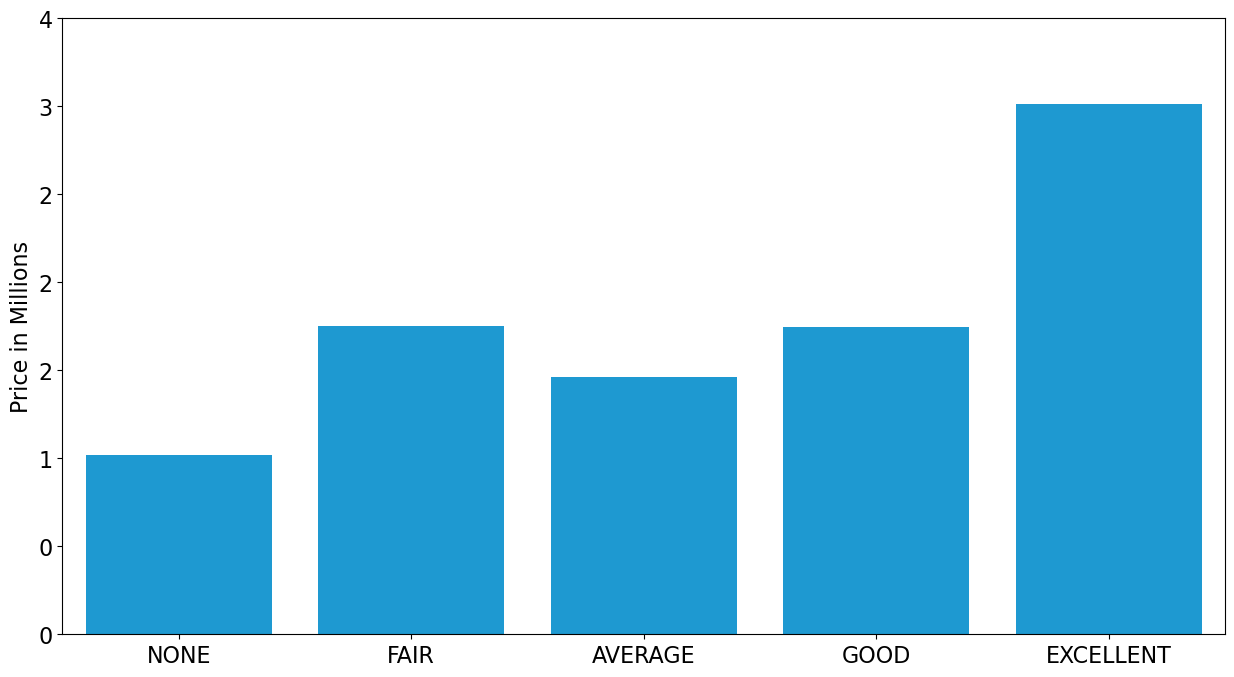

In [268]:
# Bar plot for average price by view
view_price = df[['price','view', 'view_num']].groupby(by='view')\
.mean().sort_values(by='view_num')

# set fig and ax
fig, ax = plt.subplots(figsize=(15,8))

# bar plot
sns.barplot(data=view_price.reset_index(), x='view', y='price', ax=ax, color='#00A4EF')

# This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
y_tick_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels);

# x and y labels
ax.set_xlabel("")
ax.set_ylabel("Price in Millions", fontsize=16)

# size of labels
ax.tick_params(axis='both', which='major', labelsize=16)

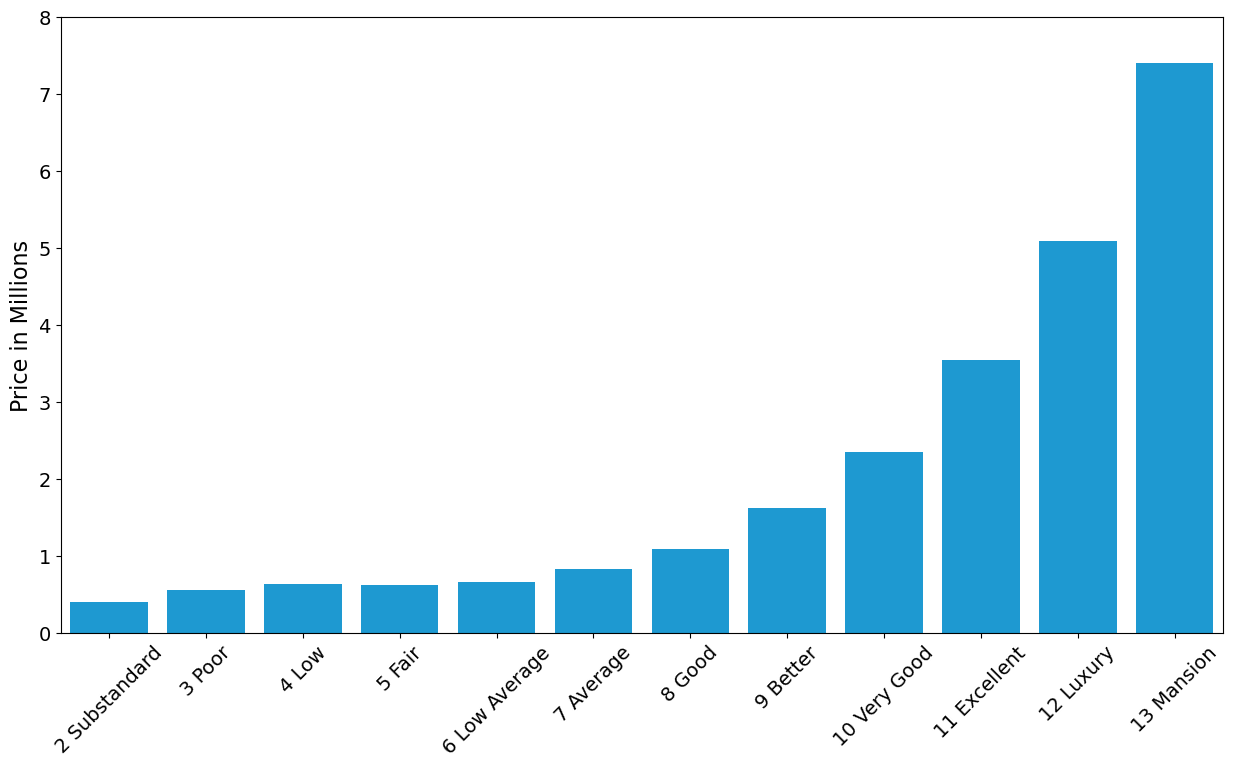

In [278]:
# Bar plot for average price by grade
grade_price = df[['price','grade', 'grade_num']]\
.groupby(by='grade').mean().sort_values(by='grade_num').reset_index()

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=grade_price, x='grade', y='price', ax=ax, color='#00A4EF')

# This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
y_tick_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels)

# x and y labels
ax.set_xlabel("")
ax.set_ylabel("Price in Millions", fontsize=16)

# size of labels
ax.tick_params(axis='x', which='major', labelsize=14, rotation = 45)
ax.tick_params(axis='y', which='major', labelsize=14);

Text(0, 0.5, 'Price in Thousands')

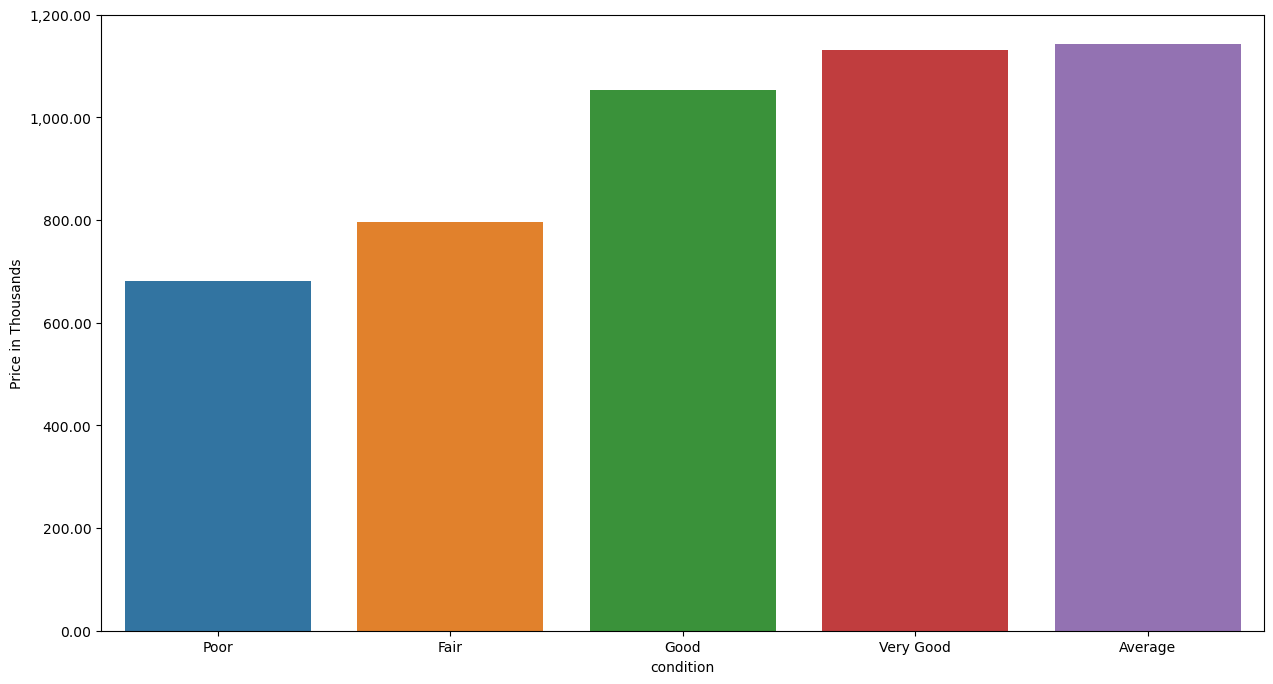

In [257]:
# Bar plot for average price by condition
condition_price = df[['price','condition']].groupby(by='condition')\
.mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(data=condition_price, x='condition', y='price', ax=ax)

# This changes the tick labels to show in thousands (ex. 500,000 -> 500) 
y_tick_labels = ['{:,.2f}'.format(x) for x in ax.get_yticks()/1000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels);

# set y label
ax.set_ylabel('Price in Thousands')

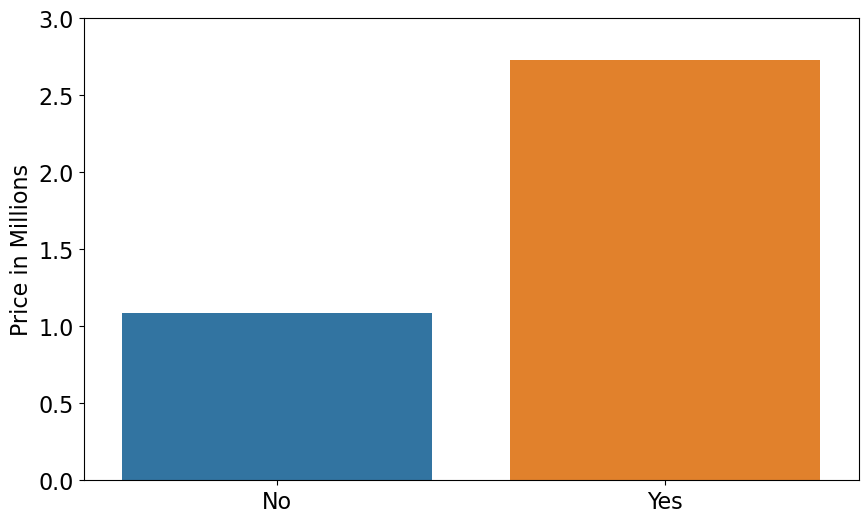

In [280]:
# Bar plot for average price by waterfront properties
waterfront_price = df[['price','waterfront']].groupby(by='waterfront')\
.mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=waterfront_price, x='waterfront', y='price', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

# This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
y_tick_labels = ['{:,.1f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels)

# set a tick labels
ax.set_xticklabels(['No', 'Yes'])

# x and y labels
ax.set_xlabel("")
ax.set_ylabel("Price in Millions", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16);

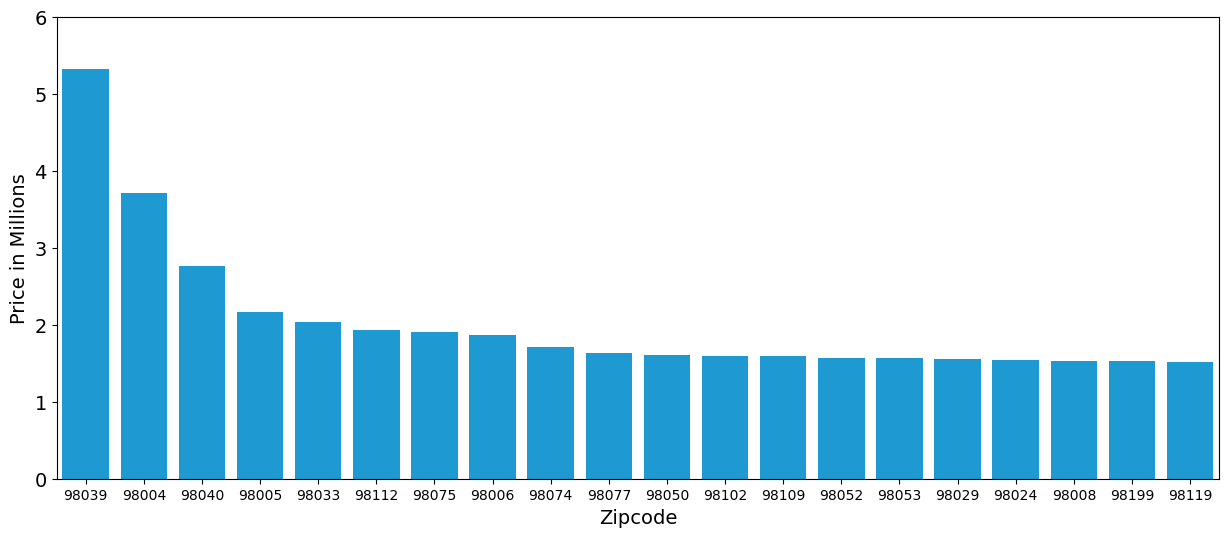

In [286]:
# bar chart of zipcodes by average price
zipcode_price = df[['price','zipcode']].groupby(by='zipcode')\
.mean().reset_index().sort_values(by='price')\
.nlargest(n=20, columns='price')

fig, ax = plt.subplots(figsize=(15,6))

sns.barplot(data=zipcode_price, x='zipcode', y='price', ax=ax, color='#00A4EF')
# plt.ticklabel_format(style='plain', axis='y',useOffset=False)
ax.set_xlabel('Zipcode', fontsize=14)
ax.set_ylabel('Price in Millions', fontsize=14)

# This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
y_tick_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels)

# size of labels
ax.tick_params(axis='x', which='major', labelsize=10)
ax.tick_params(axis='y', which='major', labelsize=14);

Now I'll look at relationships of variables with scatter plots

In [46]:
df.select_dtypes(exclude='object').drop(columns=['id', 'lat','long'])

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2022-05-24  675000.00         4       1.00         1180      7140   
1     2021-12-13  920000.00         5       2.50         2770      6703   
2     2021-09-29  311000.00         6       2.00         2880      6156   
3     2021-12-14  775000.00         3       3.00         2160      1400   
4     2021-08-24  592500.00         2       2.00         1120       758   
...          ...        ...       ...        ...          ...       ...   
30150 2021-11-30 1555000.00         5       2.00         1910      4000   
30151 2021-06-16 1313000.00         3       2.00         2020      5800   
30152 2022-05-27  800000.00         3       2.00         1620      3600   
30153 2022-02-24  775000.00         3       2.50         2570      2889   
30154 2022-04-29  500000.00         3       1.50         1200     11058   

       floors  waterfront  sqft_above  sqft_basement  sqft_garage  sqft_patio  \
0        1.00           0        1180              0            0          40   
1        1.00           0        1570           1570            0         240   
2        1.00           0        1580           1580            0           0   
3        2.00           0        1090           1070          200         270   
4        2.00           0        1120            550          550          30   
...       ...         ...         ...            ...          ...         ...   
30150    1.50           0        1600           1130            0         210   
30151    2.00           0        2020              0            0         520   
30152    1.00           0         940            920          240         110   
30153    2.00           0        1830            740          480         100   
30154    1.00           0        1200              0          420           0   

       yr_built  yr_renovated  logged_price  grade_num  condition_num  \
0          1969             0         13.42          7              4   
1          1950             0         13.73          7              3   
2          1956             0         12.65          7              3   
3          2010             0         13.56          9              3   
4          2012             0         13.29          7              3   
...         ...           ...           ...        ...            ...   
30150      1921             0         14.26          8              4   
30151      2011             0         14.09          7              3   
30152      1995             0         13.59          7              3   
30153      2006             0         13.56          8              3   
30154      1965             0         13.12          7              3   

       view_num  yr_renovated_yes_or_no  price_per_sqft  
0             1                       0          572.03  
1             3                       0          332.13  
2             3                       0          107.99  
3             3                       0          358.80  
4             1                       0          529.02  
...         ...                     ...             ...  
30150         1                       0          814.14  
30151         2                       0          650.00  
30152         1                       0          493.83  
30153         1                       0          301.56  
30154         1                       0          416.67  

[29149 rows x 20 columns]

In [47]:
# pair plots in seaborn
# sns.pairplot(data=df.select_dtypes(exclude='object').drop(columns=['id', 'lat','long']))

### Square Foot of Living Space Across Categorical Variables

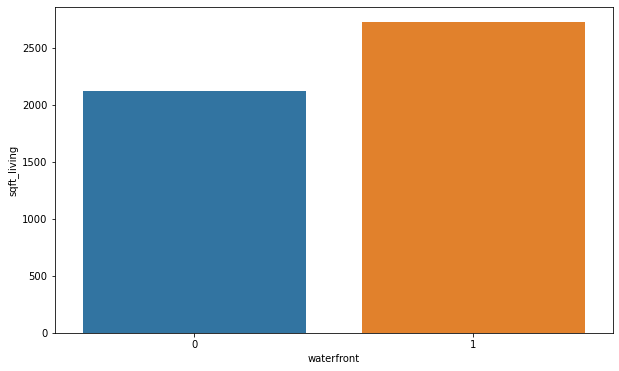

In [48]:
# average square foot of waterfront homes
waterfront_sqft = df[['sqft_living','waterfront']].groupby(by='waterfront')\
.mean().sort_values(by='sqft_living').reset_index()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=waterfront_sqft, x='waterfront', y='sqft_living', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

<AxesSubplot:xlabel='view', ylabel='sqft_living'>

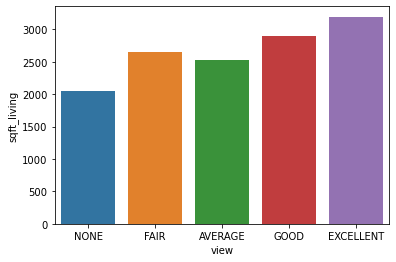

In [49]:
# Average square foot by view
view_sqft = df[['sqft_living', 'view', 'view_num']]\
.groupby(by='view').mean().reset_index().sort_values(by='view_num')

sns.barplot(data=view_sqft, x='view', y='sqft_living')

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

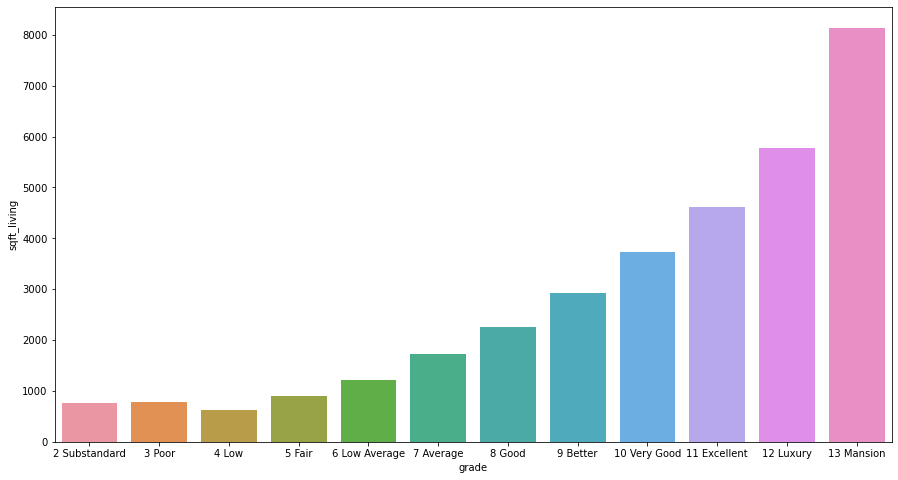

In [50]:
# Average square foot by grade
sqft_grade = df[['sqft_living', 'grade', 'grade_num']]\
.groupby(by='grade').mean().reset_index().sort_values(by='grade_num')

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

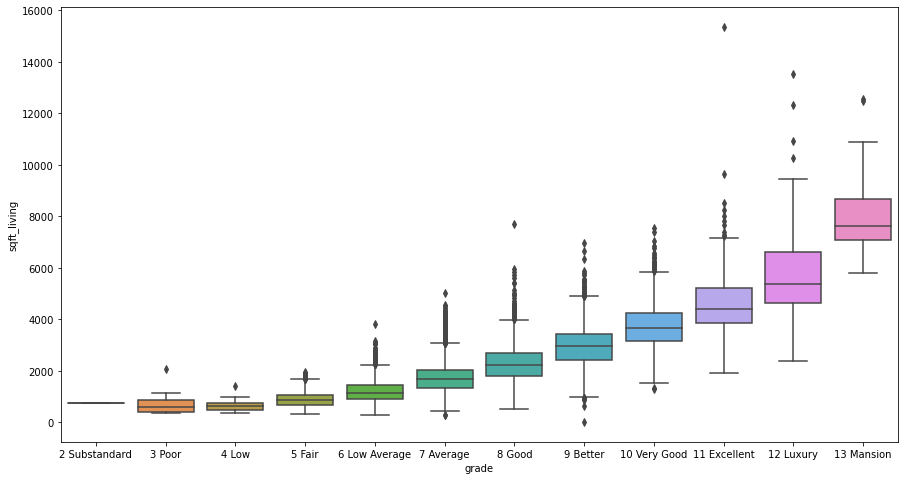

In [51]:
# box and whisker plot of sqft_living by grade
sqft_grade = df[['sqft_living', 'grade', 'grade_num']]\
.sort_values(by='grade_num')

# box and whisker plot
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

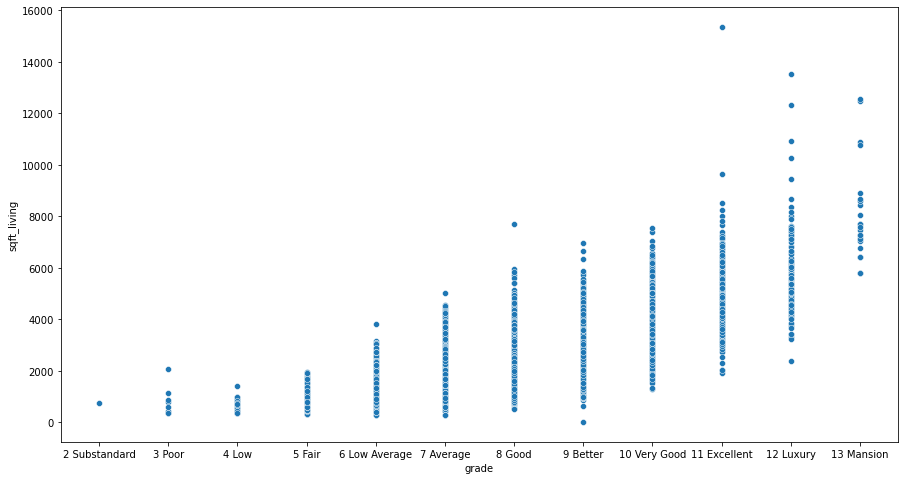

In [52]:
# Scatter plot average square foot and grade
sqft_grade = df[['sqft_living', 'grade', 'grade_num']]\
.sort_values(by='grade_num')

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)

In [53]:
df.describe().price

count      29149.00
mean     1113428.96
std       895860.33
min        27360.00
25%       645000.00
50%       869000.00
75%      1310000.00
max     30750000.00
Name: price, dtype: float64

## Simple Linear Regression

In [54]:
# correlation table
df.corr()

id  price  bedrooms  bathrooms  sqft_living  \
id                      1.00  -0.03     -0.01      -0.01        -0.03   
price                  -0.03   1.00      0.29       0.49         0.62   
bedrooms               -0.01   0.29      1.00       0.59         0.63   
bathrooms              -0.01   0.49      0.59       1.00         0.78   
sqft_living            -0.03   0.62      0.63       0.78         1.00   
sqft_lot               -0.12   0.09      0.00       0.04         0.12   
floors                  0.03   0.20      0.20       0.43         0.36   
waterfront             -0.04   0.24     -0.03       0.05         0.08   
sqft_above             -0.02   0.55      0.54       0.68         0.88   
sqft_basement          -0.02   0.25      0.23       0.26         0.34   
sqft_garage            -0.01   0.27      0.30       0.46         0.50   
sqft_patio             -0.04   0.32      0.19       0.33         0.41   
yr_built                0.02   0.11      0.18       0.46         0.33   
yr_renovated           -0.03   0.09      0.01       0.04         0.04   
lat                    -0.00   0.30     -0.02       0.05         0.05   
long                    0.01   0.08      0.13       0.18         0.23   
logged_price           -0.02   0.83      0.35       0.52         0.62   
grade_num               0.00   0.58      0.39       0.65         0.74   
condition_num          -0.01  -0.01      0.02      -0.07        -0.07   
view_num               -0.01   0.32      0.05       0.16         0.24   
yr_renovated_yes_or_no -0.01   0.04      0.02       0.03         0.01   
price_per_sqft         -0.01   0.07     -0.02       0.00        -0.02   

                        sqft_lot  floors  waterfront  sqft_above  \
id                         -0.12    0.03       -0.04       -0.02   
price                       0.09    0.20        0.24        0.55   
bedrooms                    0.00    0.20       -0.03        0.54   
bathrooms                   0.04    0.43        0.05        0.68   
sqft_living                 0.12    0.36        0.08        0.88   
sqft_lot                    1.00   -0.02        0.08        0.13   
floors                     -0.02    1.00        0.00        0.51   
waterfront                  0.08    0.00        1.00        0.06   
sqft_above                  0.13    0.51        0.06        1.00   
sqft_basement               0.00   -0.24        0.05       -0.07   
sqft_garage                 0.08    0.18       -0.02        0.55   
sqft_patio                  0.16    0.12        0.13        0.32   
yr_built                    0.01    0.52       -0.04        0.43   
yr_renovated                0.01   -0.02        0.10        0.01   
lat                        -0.07    0.05       -0.04       -0.02   
long                        0.18    0.09        0.03        0.34   
logged_price                0.08    0.26        0.14        0.55   
grade_num                   0.06    0.47        0.05        0.72   
condition_num              -0.00   -0.27        0.00       -0.15   
view_num                    0.10    0.01        0.42        0.13   
yr_renovated_yes_or_no     -0.00   -0.04        0.01       -0.02   
price_per_sqft              0.04    0.00        0.02       -0.02   

                        sqft_basement  ...  yr_built  yr_renovated   lat  \
id                              -0.02  ...      0.02         -0.03 -0.00   
price                            0.25  ...      0.11          0.09  0.30   
bedrooms                         0.23  ...      0.18          0.01 -0.02   
bathrooms                        0.26  ...      0.46          0.04  0.05   
sqft_living                      0.34  ...      0.33          0.04  0.05   
sqft_lot                         0.00  ...      0.01          0.01 -0.07   
floors                          -0.24  ...      0.52         -0.02  0.05   
waterfront                       0.05  ...     -0.04          0.10 -0.04   
sqft_above                      -0.07  ...      0.43          0.01 -0.02   
sqft_basement        

In [55]:
# correlated to price
df.corr().price.sort_values()

id                       -0.03
condition_num            -0.01
yr_renovated_yes_or_no    0.04
price_per_sqft            0.07
long                      0.08
yr_renovated              0.09
sqft_lot                  0.09
yr_built                  0.11
floors                    0.20
waterfront                0.24
sqft_basement             0.25
sqft_garage               0.27
bedrooms                  0.29
lat                       0.30
sqft_patio                0.32
view_num                  0.32
bathrooms                 0.49
sqft_above                0.55
grade_num                 0.58
sqft_living               0.62
logged_price              0.83
price                     1.00
Name: price, dtype: float64

Most correlated variables to price are sqft_living, grade_num, sqft_above, bathrooms, sqft_patio, and view_num.

For our simple linear regression we are going to use sqft_living to predict price

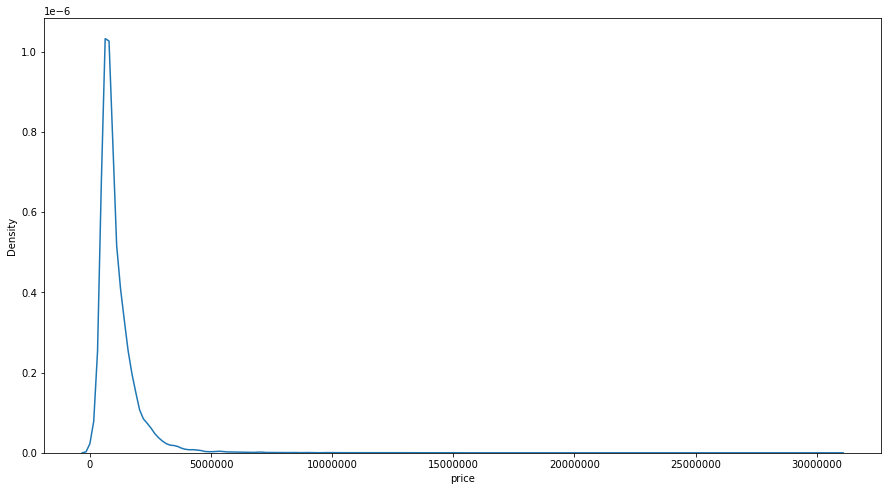

In [56]:
# distribution of price
fig, ax = plt.subplots(figsize=(15,8))

sns.kdeplot(data=df, x='price', ax=ax)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

### Model 1

In [57]:
# Setting up simple linear regression
X = df['sqft_living']
y = df['price']

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

In [58]:
# summary
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.788e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:21:32   Log-Likelihood:            -4.3389e+05
No. Observations:               29149   AIC:                         8.678e+05
Df Residuals:                   29147   BIC:                         8.678e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.205e+04   9916.153     -9.283      0.000   -1.11e+05   -7.26e+04
sqft_living   565.4853      4.229    133.723      0.000     557.197     573.774
==============================================================================
Omnibus:                    42186.638   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         49954609.033
Skew:                           8.236   Prob(JB):                         0.00
Kurtosis:                     205.136   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The distribution of price is skewed right so to try and improve our linear regression model we are going to transform the price values by using a logarithm and square root to normalize the distribution.

### Model 2

In [59]:
# Change y to the log of y to work around skewness
X = df['sqft_living']
y = np.log(df['price'])

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

<AxesSubplot:xlabel='price', ylabel='Density'>

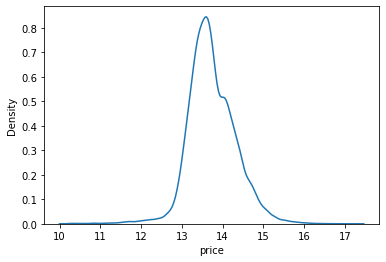

In [60]:
sns.kdeplot(data=y)

In [61]:
#summary
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.865e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:21:32   Log-Likelihood:                -18545.
No. Observations:               29149   AIC:                         3.709e+04
Df Residuals:                   29147   BIC:                         3.711e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9408      0.006   2013.231      0.000      12.928      12.953
sqft_living     0.0004   2.74e-06    136.548      0.000       0.000       0.000
==============================================================================
Omnibus:                     5812.232   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45556.724
Skew:                          -0.747   Prob(JB):                         0.00
Kurtosis:                       8.940   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3 - Baseline for Simple Linear Regression

In [62]:
# Change y to the square root of y to work around skewness
X = df['sqft_living']
y = np.sqrt(df['price'])

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 2.285e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:21:33   Log-Likelihood:            -2.0107e+05
No. Observations:               29149   AIC:                         4.022e+05
Df Residuals:                   29147   BIC:                         4.022e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         542.3970      3.370    160.961      0.000     535.792     549.002
sqft_living     0.2172      0.001    151.161      0.000       0.214       0.220
==============================================================================
Omnibus:                    12389.359   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267145.120
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                      17.510   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='price', ylabel='Density'>

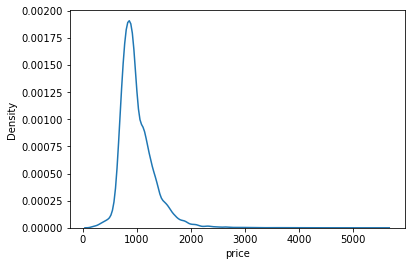

In [63]:
sns.kdeplot(data=y)

We achieved an R-squared of 0.439 in our square root of price model. This R-squared explains 43.9% of the variation of price. We are going to use this as our baseline model going forward.

## Multiple Linear Regression

In [64]:
# another look at our dataframe
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360 2022-05-24 675000.00         4       1.00         1180   
1  8910500230 2021-12-13 920000.00         5       2.50         2770   
2  1180000275 2021-09-29 311000.00         6       2.00         2880   
3  1604601802 2021-12-14 775000.00         3       3.00         2160   
4  8562780790 2021-08-24 592500.00         2       2.00         1120   

   sqft_lot  floors  waterfront greenbelt  ...  \
0      7140    1.00           0        NO  ...   
1      6703    1.00           0        NO  ...   
2      6156    1.00           0        NO  ...   
3      1400    2.00           0        NO  ...   
4       758    2.00           0        NO  ...   

                                             address   lat    long  \
0  2102 Southeast 21st Court, Renton, Washington ... 47.46 -122.19   
1  11231 Greenwood Avenue North, Seattle, Washing... 47.71 -122.36   
2  8504 South 113th Street, Seattle, Washington 9... 47.50 -122.23   
3  4079 Letitia Avenue South, Seattle, Washington... 47.57 -122.29   
4  2193 Northwest Talus Drive, Issaquah, Washingt... 47.53 -122.07   

  logged_price grade_num condition_num  view_num  yr_renovated_yes_or_no  \
0        13.42         7             4         1                       0   
1        13.73         7             3         3                       0   
2        12.65         7             3         3                       0   
3        13.56         9             3         3                       0   
4        13.29         7             3         1                       0   

   zipcode  price_per_sqft  
0    98055          572.03  
1    98133          332.13  
2    98178          107.99  
3    98118          358.80  
4    98027          529.02  

[5 rows x 32 columns]

In [65]:
# correlation to price
df.corr().price.sort_values()

id                       -0.03
condition_num            -0.01
yr_renovated_yes_or_no    0.04
price_per_sqft            0.07
long                      0.08
yr_renovated              0.09
sqft_lot                  0.09
yr_built                  0.11
floors                    0.20
waterfront                0.24
sqft_basement             0.25
sqft_garage               0.27
bedrooms                  0.29
lat                       0.30
sqft_patio                0.32
view_num                  0.32
bathrooms                 0.49
sqft_above                0.55
grade_num                 0.58
sqft_living               0.62
logged_price              0.83
price                     1.00
Name: price, dtype: float64

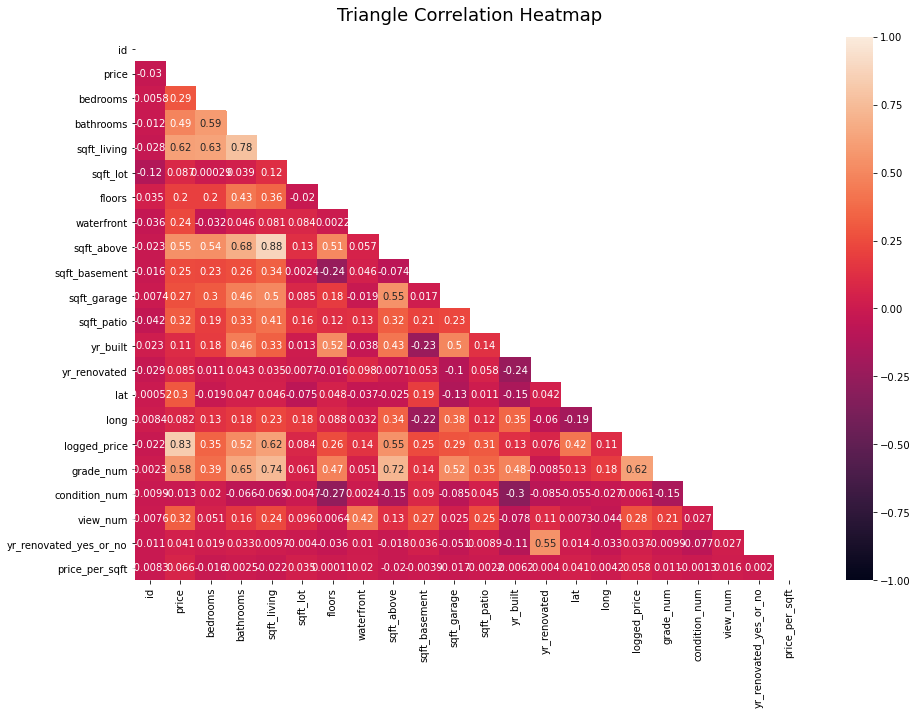

In [66]:
# correlation heat map
plt.figure(figsize=(15, 10))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Looking for multicollinearity.

sqft_above and sqft_living are highly correlated. For our regression we are going to use sqft_living.

### Model 1

In [67]:
# setting X and y variables
relevant_columns = ['sqft_living', 'bedrooms', 'bathrooms']
X = df[relevant_columns]
y = np.sqrt(df['price'])

In [68]:
model = sm.OLS(y, sm.add_constant(X)).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     8003.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:21:35   Log-Likelihood:            -2.0075e+05
No. Observations:               29149   AIC:                         4.015e+05
Df Residuals:                   29145   BIC:                         4.015e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         613.1682      5.227    117.314      0.000     602.924     623.413
sqft_living     0.2240      0.002     93.001      0.000       0.219       0.229
bedrooms      -45.8252      1.873    -24.465      0.000     -49.497     -42.154
bathrooms      31.0020      2.535     12.230      0.000      26.034      35.970
==============================================================================
Omnibus:                    11943.222   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           243979.060
Skew:                           1.473   Prob(JB):                         0.00
Kurtosis:                      16.864   Cond. No.                     9.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.45169942373829

This model did not achieve a much higher R-squared score. Now we are going to add some categorical variables starting with waterfront

### Model 2

In [70]:
# waterfront dummy variable
relevant_columns = ['sqft_living', 'bathrooms', 'waterfront']
X = df[relevant_columns]
y = np.sqrt(df['price'])

In [71]:
# model
model = sm.OLS(y, sm.add_constant(X)).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     8285.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:21:35   Log-Likelihood:            -2.0052e+05
No. Observations:               29149   AIC:                         4.011e+05
Df Residuals:                   29145   BIC:                         4.011e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         527.9432      3.860    136.759      0.000     520.377     535.510
sqft_living     0.1990      0.002     88.114      0.000       0.195       0.203
bathrooms      20.2474      2.460      8.229      0.000      15.425      25.070
waterfront    345.7063     10.565     32.721      0.000     324.998     366.415
==============================================================================
Omnibus:                     9907.120   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161421.166
Skew:                           1.199   Prob(JB):                         0.00
Kurtosis:                      14.276   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3

In [72]:
# modeling using zipcode as a dummy variable
X = df[['sqft_living', 'waterfront', 'zipcode']]
X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)
y = np.sqrt(df["price"])

# model
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     983.7
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:21:36   Log-Likelihood:            -1.9082e+05
No. Observations:               29149   AIC:                         3.818e+05
Df Residuals:                   29071   BIC:                         3.824e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           415.2842      7.138     58.182      0.000     401.294     429.274
sqft_living       0.1727      0.001    153.619      0.000       0.170       0.175
waterfront      361.2234      7.733     46.711      0.000     346.066     376.381
zipcode_98002    -5.1894     11.160     -0.465      0.642     -27.064      16.685
zipcode_98003     7.4142     10.513      0.705      0.481     -13.192      28.020
zipcode_98004   810.8839     11.694     69.340      0.000     787.962     833.805
zipcode_98005   526.7962     14.381     36.632      0.000     498.609     554.983
zipcode_98006   414.1786     10.041     41.250      0.000     394.498     433.859
zipcode_98007   369.6978     15.194     24.332      0.000     339.917     399.479
zipcode_98008   398.8616     10.842     36.787      0.000     377.610     420.113
zipcode_98010    13.8435     11.703      1.183      0.237      -9.095      36.782
zipcode_98011   252.8772     12.453     20.307      0.000     228.469     277.285
zipcode_98014   130.0865     15.118      8.605      0.000     100.454     159.719
zipcode_98019   154.4711     12.734     12.130      0.000     129.511     179.431
zipcode_98022    35.0473     10.398      3.371      0.001      14.667      55.428
zipcode_98023    -3.1362      9.314     -0.337      0.736     -21.391      15.119
zipcode_98024   298.5736     17.208     17.351      0.000     264.845     332.302
zipcode_98027   283.5402     10.987     25.807      0.000     262.005     305.075
zipcode_98028   211.1932     11.291     18.705      0.000     189.063     233.324
zipcode_98029   365.3972     11.615     31.458      0.000     342.631     388.164
zipcode_98030    19.0749     11.016      1.732      0.083      -2.518      40.668
zipcode_98031    26.3946      9.977      2.646      0.008       6.840      45.949
zipcode_98032    17.3824     14.169      1.227      0.220     -10.389      45.153
zipcode_98033   531.7712      9.641     55.155      0.000     512.874     550.669
zipcode_98034   322.5341      9.334     34.556      0.000     304.240     340.828
zipcode_98038    74.4306      8.891      8.372      0.000      57.005      91.856
zipcode_98039  1114.7913     23.079     48.304      0.000    1069.556    1160.027
zipcode_98040   589.8234     11.383     51.816      0.000     567.512     612.135
zipcode_98042    21.5781      8.631      2.500      0.012       4.661      38.496
zipcode_98045   156.8534     10.350     15.155      0.000     136.567     177.140
zipcode_98047     4.7044     20.398      0.231      0.818     -35.277      44.685
zipcode_98050   318.7525    119.561      2.666      0.008      84.407     553.098
zipcode_98051    92.4545     21.857      4.230      0.000      49.613     135.296
zipcode_98052   403.1881      9.802     41.132      0.000     383.975     422.401
zipcode_98053   332.4619     10.899     30.503   

In [73]:
# this is to check for multicollinearity
vif = pd.DataFrame({'variables':X.columns[1:], 
                    'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})
vif.sort_values(by="VIF")

variables  VIF
74  zipcode_98224 1.00
29  zipcode_98050 1.00
75  zipcode_98288 1.00
28  zipcode_98047 1.01
65  zipcode_98148 1.01
..            ...  ...
21  zipcode_98033 1.16
42  zipcode_98075 1.16
23  zipcode_98038 1.17
5   zipcode_98006 1.17
26  zipcode_98042 1.18

[76 rows x 2 columns]

### Model 4 - Standardized to See Condition Number Properly

In [74]:
# Using standardscaler to transform independent variables
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

In [75]:
# model after standardizing X
y = np.sqrt(df['price'])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     983.7
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:22:20   Log-Likelihood:            -1.9082e+05
No. Observations:               29149   AIC:                         3.818e+05
Df Residuals:                   29071   BIC:                         3.824e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1005.4661      0.989   1016.909      0.000    1003.528    1007.404
x1           168.6795      1.098    153.619      0.000     166.527     170.832
x2            47.2692      1.012     46.711      0.000      45.286      49.253
x3            -0.5755      1.238     -0.465      0.642      -3.001       1.850
x4             0.9040      1.282      0.705      0.481      -1.608       3.417
x5            84.7545      1.222     69.340      0.000      82.359      87.150
x6            41.0403      1.120     36.632      0.000      38.844      43.236
x7            55.1334      1.337     41.250      0.000      52.514      57.753
x8            26.8006      1.101     24.332      0.000      24.642      28.960
x9            46.2304      1.257     36.787      0.000      43.767      48.694
x10            1.4290      1.208      1.183      0.237      -0.939       3.797
x11           23.8213      1.173     20.307      0.000      21.522      26.121
x12            9.4911      1.103      8.605      0.000       7.329      11.653
x13           14.1022      1.163     12.130      0.000      11.823      16.381
x14            4.3538      1.292      3.371      0.001       1.822       6.886
x15           -0.4785      1.421     -0.337      0.736      -3.263       2.307
x16           18.6355      1.074     17.351      0.000      16.530      20.741
x17           32.2456      1.249     25.807      0.000      29.797      34.695
x18           22.9702      1.228     18.705      0.000      20.563      25.377
x19           38.1330      1.212     31.458      0.000      35.757      40.509
x20            2.1552      1.245      1.732      0.083      -0.284       4.595
x21            3.5266      1.333      2.646      0.008       0.914       6.139
x22            1.3767      1.122      1.227      0.220      -0.823       3.576
x23           75.9954      1.378     55.155      0.000      73.295      78.696
x24           48.9981      1.418     34.556      0.000      46.219      51.777
x25           12.5733      1.502      8.372      0.000       9.630      15.517
x26           50.1035      1.037     48.304      0.000      48.070      52.137
x27           64.1516      1.238     51.816      0.000      61.725      66.578
x28            3.9124      1.565      2.500      0.012       0.845       6.980
x29           19.6732      1.298     15.155      0.000      17.129      22.218
x30            0.2415      1.047      0.231      0.818      -1.811       2.294
x31            2.6402      0.990      2.666      0.008       0.699       4.581
x32            4.3944      1.039      4.230      0.000       2.358       6.431
x33           55.7310      1.355     41.132      0.000      53.075      58.387
x34           38.3423      1.257     30.503      0.000      35.879      40.806
x35            4.6590      1.145      4.070      0.000       2.416       6.902
x3

After standardizing our independent variables we double check our Condition Number to see if there is multicollinearity. Our new Condition Number is 8 which shows that there is very little multicollinearity in our model.

This model has achieved the highest R-squared value so far of 0.723. We are going to use this as a baseline and experiment with other variables with this model.

### Model 5

In [76]:
# modeling using grade as a dummy variable
X = df[['sqft_living', 'waterfront', 'grade']]
X = pd.get_dummies(X, columns=["grade"], drop_first=True)
y = np.sqrt(df["price"])

# Model
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     2484.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:22:20   Log-Likelihood:            -1.9864e+05
No. Observations:               29149   AIC:                         3.973e+05
Df Residuals:                   29135   BIC:                         3.974e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1029.2495      9.615    107.044      0.000    1010.403    1048.096
sqft_living             0.1207      0.002     59.943      0.000       0.117       0.125
waterfront            317.2696      9.977     31.799      0.000     297.714     336.825
grade_11 Excellent    202.1748     12.667     15.961      0.000     177.347     227.003
grade_12 Luxury       380.9928     21.267     17.915      0.000     339.309     422.677
grade_13 Mansion      506.0037     46.287     10.932      0.000     415.278     596.729
grade_2 Substandard  -488.4937    220.679     -2.214      0.027    -921.034     -55.954
grade_3 Poor         -500.2269     74.017     -6.758      0.000    -645.303    -355.151
grade_4 Low          -426.6699     33.694    -12.663      0.000    -492.711    -360.629
grade_5 Fair         -408.9781     13.961    -29.294      0.000    -436.342    -381.614
grade_6 Low Average  -400.8656      8.880    -45.143      0.000    -418.271    -383.461
grade_7 Average      -354.9281      7.517    -47.218      0.000    -369.661    -340.195
grade_8 Good         -286.6616      7.098    -40.388      0.000    -300.574    -272.750
grade_9 Better       -150.5206      7.230    -20.820      0.000    -164.691    -136.350
==============================================================================
Omnibus:                    10072.164   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173419.980
Skew:                           1.210   Prob(JB):                         0.00
Kurtosis:                      14.702   Cond. No.                     4.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 6

In [77]:
# modeling using zipcode, waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     952.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:22:21   Log-Likelihood:            -1.8973e+05
No. Observations:               29149   AIC:                         3.796e+05
Df Residuals:                   29060   BIC:                         3.804e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 679.9048      9.958     68.278      0.000     660.387     699.423
sqft_living             0.1258      0.002     81.860      0.000       0.123       0.129
waterfront            339.3029      7.502     45.226      0.000     324.598     354.008
zipcode_98002          -8.4509     10.777     -0.784      0.433     -29.575      12.673
zipcode_98003           2.3982     10.137      0.237      0.813     -17.471      22.267
zipcode_98004         758.0804     11.346     66.814      0.000     735.841     780.319
zipcode_98005         487.8725     13.887     35.133      0.000     460.654     515.091
zipcode_98006         370.6134      9.729     38.093      0.000     351.544     389.683
zipcode_98007         356.5791     14.650     24.340      0.000     327.864     385.294
zipcode_98008         388.8399     10.454     37.194      0.000     368.349     409.331
zipcode_98010          17.9959     11.300      1.593      0.111      -4.152      40.144
zipcode_98011         247.0572     12.007     20.576      0.000     223.523     270.592
zipcode_98014         121.8694     14.571      8.364      0.000      93.310     150.428
zipcode_98019         142.5140     12.282     11.603      0.000     118.441     166.587
zipcode_98022          29.6362     10.023      2.957      0.003       9.991      49.281
zipcode_98023         -16.4363      8.986     -1.829      0.067     -34.050       1.177
zipcode_98024         280.7962     16.594     16.921      0.000     248.271     313.322
zipcode_98027         257.9664     10.616     24.299      0.000     237.158     278.775
zipcode_98028         209.9366     10.886     19.285      0.000     188.599     231.274
zipcode_98029         320.7757     11.259     28.492      0.000     298.708     342.843
zipcode_98030          15.4413     10.617      1.454      0.146      -5.368      36.250
zipcode_98031          23.9694      9.620      2.492      0.013       5.114      42.825
zipcode_98032          13.0630     13.664      0.956      0.339     -13.719      39.845
zipcode_98033         500.9329      9.324     53.726      0.000     482.658     519.208
zipcode_98034         317.9504      9.006     35.303      0.000     300.297     335.603
zipcode_98038          71.1629      8.570      8.304      0.000      54.365      87.960
zipcode_98039        1045.0808     22.321     46.821      0.000    1001.331    1088.831
zipcode_98040         531.9493     11.059     48.102      0.000     510.274     553.625
zipcode_98042          18.0134      8.322      2.165      0.030       1.703      34.324
zipcode_98045         145.2161      9.987     14.540      0.000     125.640     164.792
zipcode_98047           3.6675     19.664      0.187      0.852     -34.876      42.211
zipcode_98050         317.7815    115.214      2.758      0.006      91.958     543.605
zip

In [78]:
# get our predicted y values
y_pred = model.predict(sm.add_constant(X))

# print MAE and RMSE
print(mean_absolute_error(y, y_pred))
print(mean_squared_error(y, y_pred, squared=False))


103.10748183319006
162.3991551236614


### Model 7

In [79]:
# modeling using zipcode, and yr_renovated as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'yr_renovated_yes_or_no']]
X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)
y = np.sqrt(df["price"])

# model
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     973.9
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:22:21   Log-Likelihood:            -1.9079e+05
No. Observations:               29149   AIC:                         3.817e+05
Df Residuals:                   29070   BIC:                         3.824e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    415.2964      7.130     58.245      0.000     401.321     429.272
sqft_living                0.1725      0.001    153.621      0.000       0.170       0.175
waterfront               360.6635      7.725     46.686      0.000     345.522     375.805
yr_renovated_yes_or_no    65.3566      8.268      7.904      0.000      49.150      81.563
zipcode_98002             -6.3957     11.149     -0.574      0.566     -28.249      15.458
zipcode_98003              7.1129     10.502      0.677      0.498     -13.472      27.697
zipcode_98004            809.4066     11.684     69.278      0.000     786.506     832.307
zipcode_98005            526.4962     14.366     36.649      0.000     498.339     554.654
zipcode_98006            413.1305     10.031     41.185      0.000     393.469     432.792
zipcode_98007            368.3283     15.179     24.266      0.000     338.577     398.080
zipcode_98008            397.8899     10.832     36.734      0.000     376.659     419.120
zipcode_98010             14.0588     11.691      1.203      0.229      -8.855      36.973
zipcode_98011            252.2355     12.440     20.276      0.000     227.853     276.618
zipcode_98014            129.6208     15.103      8.583      0.000     100.019     159.223
zipcode_98019            154.8235     12.721     12.171      0.000     129.890     179.757
zipcode_98022             34.1962     10.388      3.292      0.001      13.836      54.556
zipcode_98023             -3.4752      9.304     -0.374      0.709     -21.711      14.761
zipcode_98024            298.9903     17.190     17.393      0.000     265.297     332.684
zipcode_98027            283.2480     10.975     25.808      0.000     261.736     304.760
zipcode_98028            210.9752     11.279     18.705      0.000     188.868     233.082
zipcode_98029            365.7815     11.603     31.524      0.000     343.039     388.524
zipcode_98030             18.8614     11.005      1.714      0.087      -2.709      40.431
zipcode_98031             26.3219      9.966      2.641      0.008       6.788      45.856
zipcode_98032             17.3100     14.154      1.223      0.221     -10.432      45.052
zipcode_98033            530.2215      9.633     55.041      0.000     511.340     549.103
zipcode_98034            322.3804      9.324     34.576      0.000     304.105     340.655
zipcode_98038             74.3981      8.881      8.377      0.000      56.991      91.806
zipcode_98039           1115.4178     23.055     48.382      0.000    1070.230    1160.606
zipcode_98040            589.4308     11.371     51.836      0.000     567.143     611.719
zipcode_98042             21.3067      8.622      2.471      0.013       4.407      38.206
zipcode_98045            156.5427     10.339     15.141      0.000     136.278  

### Model 8

In [80]:
# modeling using yr_renovated_yes_or_no as a dummy variable
X = df[['sqft_living', 'yr_renovated_yes_or_no']]
y = np.sqrt(df["price"])

# model
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.148e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:22:21   Log-Likelihood:            -2.0104e+05
No. Observations:               29149   AIC:                         4.021e+05
Df Residuals:                   29146   BIC:                         4.021e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    541.2650      3.369    160.659      0.000     534.661     547.868
sqft_living                0.2171      0.001    151.240      0.000       0.214       0.220
yr_renovated_yes_or_no    93.9212     11.699      8.028      0.000      70.990     116.852
==============================================================================
Omnibus:                    12351.562   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264672.879
Skew:                           1.529   Prob(JB):                         0.00
Kurtosis:                      17.442   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Taking a look at outliers in prices

<AxesSubplot:xlabel='price', ylabel='Density'>

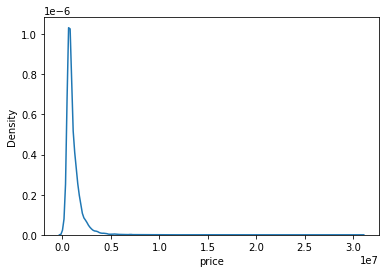

In [81]:
# price distribution
sns.kdeplot(data=df['price'])

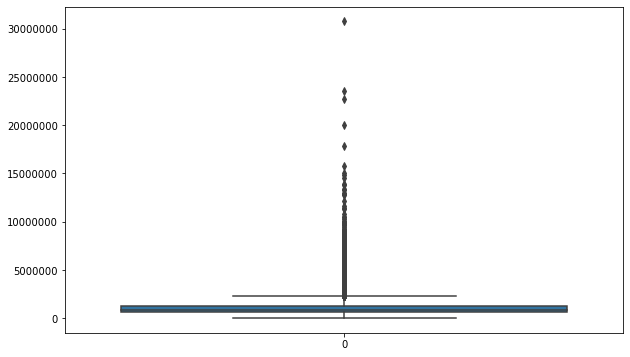

In [82]:
# box and whisker plot of price
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(data=df['price'], ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

In [83]:
print(df['price'].mean())
print(df['price'].median())

1113428.9581117705
869000.0


Running our model on our dataframe filtered to prices less than 5,000,000

### Model 9

In [84]:
# setting X and y values
df1 = df[(df.price) < 5000000]

# modeling using zipcode waterfront, and grade as dummy variables
X = df1[['sqft_living', 'waterfront', 'zipcode', 'grade']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df1["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     933.9
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:22:22   Log-Likelihood:            -1.8519e+05
No. Observations:               28946   AIC:                         3.706e+05
Df Residuals:                   28857   BIC:                         3.713e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 694.5515      8.970     77.428      0.000     676.969     712.134
sqft_living             0.1222      0.001     87.318      0.000       0.119       0.125
waterfront            214.7140      7.294     29.438      0.000     200.418     229.010
zipcode_98002         -10.0425      9.644     -1.041      0.298     -28.945       8.860
zipcode_98003          -7.5387      9.083     -0.830      0.407     -25.342      10.265
zipcode_98004         663.4782     10.866     61.058      0.000     642.180     684.777
zipcode_98005         495.1028     12.455     39.751      0.000     470.690     519.516
zipcode_98006         374.0794      8.744     42.780      0.000     356.940     391.219
zipcode_98007         353.8917     13.110     26.995      0.000     328.197     379.587
zipcode_98008         386.5960      9.376     41.232      0.000     368.218     404.974
zipcode_98010          25.1312     10.113      2.485      0.013       5.310      44.952
zipcode_98011         246.1720     10.744     22.912      0.000     225.113     267.231
zipcode_98014         129.5919     13.039      9.939      0.000     104.035     155.149
zipcode_98019         141.6857     10.990     12.892      0.000     120.144     163.227
zipcode_98022          28.7096      8.969      3.201      0.001      11.130      46.289
zipcode_98023         -15.3178      8.041     -1.905      0.057     -31.079       0.443
zipcode_98024         212.6657     15.312     13.889      0.000     182.653     242.678
zipcode_98027         254.0003      9.523     26.672      0.000     235.334     272.666
zipcode_98028         208.4640      9.741     21.400      0.000     189.371     227.557
zipcode_98029         317.2396     10.105     31.394      0.000     297.433     337.046
zipcode_98030          12.8820      9.500      1.356      0.175      -5.739      31.503
zipcode_98031          21.0277      8.608      2.443      0.015       4.155      37.900
zipcode_98032          14.2891     12.227      1.169      0.243      -9.677      38.255
zipcode_98033         492.5413      8.368     58.860      0.000     476.140     508.943
zipcode_98034         308.9816      8.077     38.256      0.000     293.151     324.812
zipcode_98038          72.7289      7.669      9.484      0.000      57.698      87.760
zipcode_98039         909.9639     25.312     35.951      0.000     860.352     959.576
zipcode_98040         499.8557     10.121     49.386      0.000     480.017     519.694
zipcode_98042          16.4188      7.446      2.205      0.027       1.823      31.014
zipcode_98045         149.5003      8.937     16.727      0.000     131.982     167.018
zipcode_98047           0.0692     17.596      0.004      0.997     -34.421      34.559
zipcode_98050         319.7484    103.096      3.101      0.002     117.675     521.822
zip

This model does not perform much better than our baseline model

### Model 10

In [85]:
# adding year_built and renovated to model
# setting X and y values
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'yr_built']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     950.4
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:22:23   Log-Likelihood:            -1.8964e+05
No. Observations:               29149   AIC:                         3.795e+05
Df Residuals:                   29059   BIC:                         3.802e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1824.4428     83.506     21.848      0.000    1660.768    1988.118
sqft_living             0.1241      0.002     80.739      0.000       0.121       0.127
waterfront            331.3040      7.500     44.172      0.000     316.603     346.005
yr_built               -0.5659      0.041    -13.804      0.000      -0.646      -0.486
zipcode_98002         -13.6184     10.749     -1.267      0.205     -34.686       7.450
zipcode_98003          -2.6044     10.110     -0.258      0.797     -22.421      17.213
zipcode_98004         746.2068     11.342     65.792      0.000     723.976     768.438
zipcode_98005         472.5866     13.886     34.034      0.000     445.370     499.803
zipcode_98006         358.7420      9.736     36.848      0.000     339.660     377.824
zipcode_98007         345.0032     14.627     23.587      0.000     316.334     373.672
zipcode_98008         376.4209     10.459     35.989      0.000     355.920     396.921
zipcode_98010          25.5365     11.276      2.265      0.024       3.434      47.639
zipcode_98011         242.6229     11.972     20.265      0.000     219.157     266.089
zipcode_98014         123.0205     14.524      8.470      0.000      94.554     151.487
zipcode_98019         145.4637     12.244     11.880      0.000     121.465     169.462
zipcode_98022          26.7218      9.993      2.674      0.007       7.136      46.308
zipcode_98023         -21.0909      8.963     -2.353      0.019     -38.659      -3.522
zipcode_98024         277.2488     16.542     16.760      0.000     244.825     309.673
zipcode_98027         251.9999     10.591     23.795      0.000     231.242     272.758
zipcode_98028         205.4298     10.856     18.924      0.000     184.152     226.707
zipcode_98029         318.4535     11.223     28.374      0.000     296.455     340.452
zipcode_98030          15.1933     10.582      1.436      0.151      -5.548      35.935
zipcode_98031          22.4629      9.589      2.343      0.019       3.668      41.258
zipcode_98032           5.4070     13.631      0.397      0.692     -21.310      32.124
zipcode_98033         494.6130      9.305     53.156      0.000     476.375     512.851
zipcode_98034         313.7157      8.982     34.925      0.000     296.110     331.322
zipcode_98038          76.0857      8.550      8.899      0.000      59.328      92.843
zipcode_98039        1030.6577     22.273     46.274      0.000     987.002    1074.313
zipcode_98040         516.0849     11.083     46.567      0.000     494.363     537.807
zipcode_98042          20.0997      8.296      2.423      0.015       3.839      36.360
zipcode_98045         147.4347      9.956     14.808      0.000     127.920     166.949
zipcode_98047          10.4121     19.607      0.531      0.595     -28.018      48.842
zip

### Model 11

In [86]:
# adding more features to our model
# setting X and y values
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'yr_renovated_yes_or_no',
       'yr_built', 'sqft_patio', 'sqft_basement', 'condition','view',
       'bathrooms', 'floors']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'condition', 'view'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     891.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:22:23   Log-Likelihood:            -1.8884e+05
No. Observations:               29149   AIC:                         3.779e+05
Df Residuals:                   29046   BIC:                         3.787e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1232.5493     96.359     12.791      0.000    1043.680    1421.418
sqft_living                0.1182      0.002     57.274      0.000       0.114       0.122
waterfront               199.0636      8.550     23.282      0.000     182.305     215.822
yr_renovated_yes_or_no    73.5144      7.916      9.287      0.000      57.999      89.030
yr_built                  -0.2554      0.048     -5.271      0.000      -0.350      -0.160
sqft_patio                 0.0240      0.004      5.600      0.000       0.016       0.032
sqft_basement             -0.0284      0.002    -12.909      0.000      -0.033      -0.024
bathrooms                 15.2236      1.855      8.205      0.000      11.587      18.860
floors                   -18.8582      2.581     -7.307      0.000     -23.917     -13.800
zipcode_98002            -16.2130     10.480     -1.547      0.122     -36.754       4.328
zipcode_98003             -8.9186      9.855     -0.905      0.365     -28.235      10.398
zipcode_98004            751.0665     11.060     67.906      0.000     729.388     772.745
zipcode_98005            464.2592     13.549     34.264      0.000     437.702     490.816
zipcode_98006            350.5582      9.507     36.872      0.000     331.923     369.193
zipcode_98007            349.1458     14.246     24.509      0.000     321.224     377.068
zipcode_98008            365.1792     10.206     35.782      0.000     345.176     385.183
zipcode_98010             22.7819     10.990      2.073      0.038       1.241      44.323
zipcode_98011            251.7847     11.661     21.593      0.000     228.929     274.640
zipcode_98014            125.7723     14.146      8.891      0.000      98.045     153.499
zipcode_98019            152.3443     11.922     12.778      0.000     128.976     175.713
zipcode_98022              5.9573      9.768      0.610      0.542     -13.188      25.102
zipcode_98023            -22.1371      8.742     -2.532      0.011     -39.271      -5.003
zipcode_98024            275.1245     16.142     17.044      0.000     243.486     306.763
zipcode_98027            250.2252     10.334     24.214      0.000     229.970     270.480
zipcode_98028            213.8220     10.580     20.210      0.000     193.085     234.559
zipcode_98029            327.0534     10.939     29.897      0.000     305.612     348.495
zipcode_98030             11.0465     10.311      1.071      0.284      -9.164      31.257
zipcode_98031             23.3007      9.340      2.495      0.013       4.993      41.608
zipcode_98032             10.1671     13.280      0.766      0.444     -15.863      36.197
zipcode_98033            498.6402      9.067     54.996      0.000     480.869     516.412
zipcode_98034            312.4955      8.759     35.677      0.000     295.328  

This model did produce a much higher R-squared value than our baseline. We are going to use sqft_living, waterfront, zipcode, grade, and view in a new model.

### Model 12 - Final Model Before Train-Test Split

In [87]:
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'view']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'view'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     954.7
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:22:24   Log-Likelihood:            -1.8922e+05
No. Observations:               29149   AIC:                         3.786e+05
Df Residuals:                   29056   BIC:                         3.794e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 727.9857     10.582     68.794      0.000     707.244     748.727
sqft_living             0.1205      0.002     79.103      0.000       0.117       0.123
waterfront            201.6571      8.638     23.345      0.000     184.726     218.588
zipcode_98002          -7.8749     10.592     -0.743      0.457     -28.636      12.886
zipcode_98003          -3.1276      9.968     -0.314      0.754     -22.665      16.410
zipcode_98004         757.8602     11.156     67.935      0.000     735.995     779.726
zipcode_98005         484.6668     13.649     35.509      0.000     457.914     511.420
zipcode_98006         360.7255      9.567     37.705      0.000     341.973     379.477
zipcode_98007         360.9975     14.399     25.070      0.000     332.774     389.221
zipcode_98008         378.2348     10.281     36.789      0.000     358.083     398.386
zipcode_98010          18.5836     11.108      1.673      0.094      -3.188      40.355
zipcode_98011         250.0930     11.801     21.193      0.000     226.963     273.223
zipcode_98014         125.3538     14.323      8.752      0.000      97.281     153.427
zipcode_98019         145.1931     12.071     12.028      0.000     121.533     168.853
zipcode_98022          14.6302      9.886      1.480      0.139      -4.747      34.007
zipcode_98023         -16.4385      8.834     -1.861      0.063     -33.753       0.876
zipcode_98024         287.9194     16.316     17.647      0.000     255.940     319.899
zipcode_98027         257.1441     10.435     24.643      0.000     236.692     277.596
zipcode_98028         208.6154     10.700     19.497      0.000     187.643     229.588
zipcode_98029         321.3285     11.065     29.039      0.000     299.640     343.017
zipcode_98030          15.9906     10.434      1.533      0.125      -4.460      36.442
zipcode_98031          25.2664      9.454      2.672      0.008       6.735      43.797
zipcode_98032          13.5719     13.429      1.011      0.312     -12.750      39.894
zipcode_98033         502.3322      9.165     54.809      0.000     484.368     520.296
zipcode_98034         313.9377      8.853     35.462      0.000     296.586     331.290
zipcode_98038          74.4701      8.423      8.841      0.000      57.960      90.980
zipcode_98039        1038.3588     21.939     47.330      0.000     995.358    1081.359
zipcode_98040         522.4565     10.892     47.965      0.000     501.107     543.806
zipcode_98042          19.2991      8.179      2.360      0.018       3.268      35.330
zipcode_98045         146.7678      9.822     14.943      0.000     127.516     166.019
zipcode_98047           2.9911     19.326      0.155      0.877     -34.889      40.872
zipcode_98050         286.2534    113.264      2.527      0.011      64.251     508.256
zip

In [88]:
# Performance Metrics
y_pred = model.predict(sm.add_constant(X))

print(mean_absolute_error(y, y_pred) ** 2)
print(mean_squared_error(y, y_pred, squared=True))

10250.275511167001
25470.254909838517


### Final Model Description

## Train-Test Split

We are going to use our Model 12 to do Train-Test Split on the data

In [89]:
# defining X and y
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'view']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'view'], drop_first=True)
y = np.sqrt(df["price"])

In [90]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
# set up Linear Regression
lr = LinearRegression()

In [92]:
# fit model
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
# metrics
y_pred = lr.predict(X_train)

print(lr.score(X_train, y_train))
print(mean_absolute_error(y_train, y_pred) ** 2)
print(mean_squared_error(y_train, y_pred, squared=True))

0.7468931385089193
10177.375220832524
25584.576470030875


Our training model MAE is about 10,307 dollars which means are margin of error for predicting a house is 10,307 dollars in either direction. Our RMSE is 26,239 dollars.

Now to predict on our X_test and evaluate based on y_test

In [94]:
# metrics
y_pred = lr.predict(X_test)

print(mean_absolute_error(y_test, y_pred) ** 2)
print(mean_squared_error(y_test, y_pred, squared=True))

10409.560881988144
25374.09199791679


Our test showed a slight increase in MAE and a decrease in our RMSE.

### Testing our model with example data

In [95]:
# test data
data = {
    'sqft_living': 2000,
    'waterfront': 0, 
    'zipcode_98002': 0,
    'zipcode_98003': 0,
    'zipcode_98004': 0,
    'zipcode_98005': 0,
    'zipcode_98006': 0, 
    'zipcode_98007': 0,
    'zipcode_98008': 0,
    'zipcode_98010': 0,
    'zipcode_98011': 0, 
    'zipcode_98014': 0,
    'zipcode_98019': 0, 
    'zipcode_98022': 0, 
    'zipcode_98023': 0, 
    'zipcode_98024': 0,
    'zipcode_98027': 0,
    'zipcode_98028': 0, 
    'zipcode_98029': 0, 
    'zipcode_98030': 0,
    'zipcode_98031': 0, 
    'zipcode_98032': 0, 
    'zipcode_98033': 0, 
    'zipcode_98034': 0,
    'zipcode_98038': 0, 
    'zipcode_98039': 0, 
    'zipcode_98040': 0, 
    'zipcode_98042': 0,
    'zipcode_98045': 0, 
    'zipcode_98047': 0, 
    'zipcode_98050': 0, 
    'zipcode_98051': 0,
    'zipcode_98052': 0, 
    'zipcode_98053': 0, 
    'zipcode_98055': 0, 
    'zipcode_98056': 0,
    'zipcode_98057': 0, 
    'zipcode_98058': 0, 
    'zipcode_98059': 0, 
    'zipcode_98065': 0,
    'zipcode_98070': 0, 
    'zipcode_98072': 0, 
    'zipcode_98074': 0, 
    'zipcode_98075': 0,
    'zipcode_98077': 0, 
    'zipcode_98092': 0, 
    'zipcode_98102': 0, 
    'zipcode_98103': 0,
    'zipcode_98105': 0, 
    'zipcode_98106': 0,
    'zipcode_98107': 0, 
    'zipcode_98108': 0,
    'zipcode_98109': 0, 
    'zipcode_98112': 0, 
    'zipcode_98115': 0, 
    'zipcode_98116': 0,
    'zipcode_98117': 0, 
    'zipcode_98118': 0, 
    'zipcode_98119': 0, 
    'zipcode_98122': 0,
    'zipcode_98125': 0, 
    'zipcode_98126': 0, 
    'zipcode_98133': 0, 
    'zipcode_98136': 0,
    'zipcode_98144': 0, 
    'zipcode_98146': 0, 
    'zipcode_98148': 0, 
    'zipcode_98155': 0,
    'zipcode_98166': 0, 
    'zipcode_98168': 0, 
    'zipcode_98177': 0, 
    'zipcode_98178': 0,
    'zipcode_98188': 0, 
    'zipcode_98198': 1, 
    'zipcode_98199': 0, 
    'zipcode_98224': 0,
    'zipcode_98288': 0, 
    'grade_11 Excellent': 0, 
    'grade_12 Luxury': 0,
    'grade_13 Mansion': 0, 
    'grade_2 Substandard': 0, 
    'grade_3 Poor': 0,
    'grade_4 Low': 1, 
    'grade_5 Fair': 0, 
    'grade_6 Low Average': 0, 
    'grade_7 Average': 0,
    'grade_8 Good': 0, 
    'grade_9 Better': 0, 
    'view_EXCELLENT': 0, 
    'view_FAIR': 0,
    'view_GOOD': 1, 
    'view_NONE': 0
    }

In [96]:
# convert dictionary to np series
data = pd.Series(data)

# extract values from data
data_values = data.values

# convert to a 2D array
data_values = data_values.reshape(1,-1)

# predict housing price based on data inputs
print(round(float(lr.predict(data_values) ** 2), ndigits=2))

674292.2


Our model predicts this house would cost $478,695.25

### Function to input data to predict

Create a function to input paramaters and it will return the predicted house price.

In [97]:
# paramaters to enter 'sqft_living', 'waterfront', 'zipcode', 'grade', 'view'

def house_price(sqft_living, waterfront, zipcode, grade, view):
    '''
    Enter the following parameters sqft_living, waterfront, zipcode,
    grade, and view and the function will return the predicted housing
    price. The grade and view parameters need to match the categorical 
    values from the df dataframe.
    '''
    # dictionary keys
    dict_keys = list(model.params.index[1:])

    # create dictionary
    params_dictionary = { param : None for param in dict_keys }

    # assign paramaters to dictionary
    params_dictionary['sqft_living'] = sqft_living
    params_dictionary['waterfront'] = waterfront

    # for loop to check zipcode
    for key in params_dictionary.keys():
        if 'zipcode' in key:
            if zipcode in key:
                params_dictionary[key] = 1
            else:
                params_dictionary[key] = 0

    # for loop to check grade      
    for key in params_dictionary.keys():
        if 'grade' in key:
            if grade.lower() in key.lower():
                params_dictionary[key] = 1
            else:
                params_dictionary[key] = 0    

    # for loop to check grade      
    for key in params_dictionary.keys():
        if 'view' in key:
            if view.lower() in key.lower():
                params_dictionary[key] = 1
            else:
                params_dictionary[key] = 0  
                
    # convert dictionary to np series
    data = pd.Series(params_dictionary)

    # extract values from data
    data_values = data.values
    
    # convert to a 2D array
    data_values = data_values.reshape(1,-1)
    
    # square the predicted value to get the house price in dollars
    return (round(float(lr.predict(data_values) ** 2), ndigits=2))


In [98]:
# test out the function

house_price(2000, 0, '98198', '4 Low', 'GOOD')

674292.2

Function prints out the same housing price as the previous test cells.

In [99]:
df['zipcode'].unique()[2]

'98178'

In [100]:
# Run a for loop to display housing prices for each
# zipcode for similar houses
for zipcode in list(df['zipcode'].unique()):
    print(tuple([zipcode, house_price(2000, 0, zipcode, '4 Low', 'GOOD')]))

('98055', 721837.56)
('98133', 938016.52)
('98178', 741114.49)
('98118', 915069.8)
('98027', 1102414.74)
('98166', 819260.14)
('98030', 666034.32)
('98023', 611140.11)
('98019', 884149.78)
('98144', 1045301.68)
('98031', 681101.97)
('98092', 635179.42)
('98103', 1189217.71)
('98006', 1359683.27)
('98136', 1051663.82)
('98007', 1338913.11)
('98038', 771655.72)
('98057', 720457.09)
('98077', 1150830.36)
('98126', 920684.53)
('98053', 1232997.72)
('98039', 3331358.64)
('98107', 1179161.44)
('98008', 1386252.8)
('98155', 982495.79)
('98168', 695426.22)
('98199', 1258300.5)
('98004', 2404870.91)
('98045', 906475.22)
('98052', 1408505.42)
('98011', 1093741.93)
('98002', 631715.97)
('98033', 1689931.58)
('98116', 1089271.08)
('98198', 674292.2)
('98125', 998160.85)
('98001', 641136.3)
('98112', 1500029.5)
('98034', 1223107.88)
('98056', 936714.5)
('98059', 917613.51)
('98005', 1679840.86)
('98040', 1724519.55)
('98014', 840799.59)
('98106', 818569.91)
('98029', 1278894.47)
('98122', 1129557.3

### Finding zipcodes to meet business objectives

We are looking for zipcodes which have an average living space square foot between 1900 and 2300 or about an average of 2100. From there we also want to see which zipcodes have a lot of "Good" views. Then we will see the average grades of the remaining zipcodes.

In [101]:
# data frame containing average sqft_living and zipcode
sqft_zip = df[['zipcode', 'sqft_living']].groupby(by='zipcode').mean().\
sort_values(by='sqft_living').reset_index()

In [102]:
# filter the data frame by 1900-2300 average sqft
filter1 = sqft_zip['sqft_living'] >= 1900
filter2 = sqft_zip['sqft_living'] <= 2300

# filter for zipcodes and list of the zipcodes we need
filtered_zipcodes = sqft_zip.loc[filter1 & filter2].zipcode.values

In [120]:
len(filtered_zipcodes)

22

In [109]:
# filter dataframe to only show filtered_zipcodes
df_filtered = df.loc[df['zipcode'].isin(filtered_zipcodes)].copy()

# filter for "Good" views or view_num == 4
view_filter = df_filtered['view_num'] == 4

# filter dataframe
df_filtered = df_filtered.loc[view_filter].copy()

# count zipcodes with most good views
view_zipcode = df_filtered[['zipcode', 'view']].groupby(by='zipcode').count().\
reset_index().sort_values(by='view').copy()

# filter by more than 9 good views
view_zipcodes = view_zipcode.loc[view_zipcode['view'] >= 10].zipcode.values

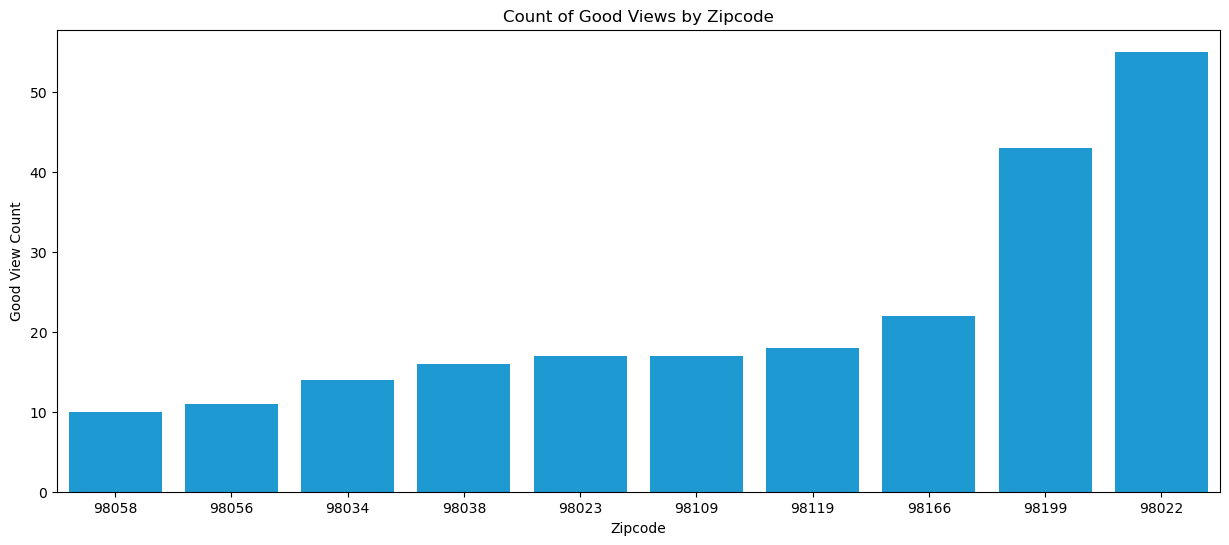

In [155]:
# bar chart of the zipcodes we found with most views
fig, ax = plt.subplots(figsize=(15,6))

# bar chart
sns.barplot(data=view_zipcode[view_zipcode['view'] >=10], x='zipcode',
           y='view', color='#00A4EF', ax=ax)
ax.set_xlabel("Zipcode")
ax.set_ylabel("Good View Count")
ax.set_title("Count of Good Views by Zipcode")

# save plot as jpg
plt.savefig('./count_of_good_views.jpg', bbox_inches='tight')

We have a our list of zipcodes that have an average living square feet between 1900 and 2300 and have a lot of homes with Good views. Now we are going to see what grade of homes are in each zipcode.

In [111]:
# set max rows
pd.set_option("display.max_rows", None, "display.max_columns", None)

# filter dataframe by view_zipcode
df_filtered = df.loc[df['zipcode'].isin(view_zipcodes)].copy()

# group by zipcode and then grade and then count
df_filtered = df_filtered[['zipcode', 'grade','grade_num']].groupby(by=['zipcode', 'grade'])\
.count().reset_index().copy()

# # only show the relevant grades
relevant_grade =['2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average']
df_filtered = df_filtered.loc[df_filtered['grade'].isin(relevant_grade)].copy()

# get the final list of the zipcodes we are going to use
final_zipcodes = df_filtered.zipcode.value_counts()
final_zipcodes = final_zipcodes[final_zipcodes > 1].index

In [146]:
df_filtered.groupby(by='zipcode').sum().reset_index()\
.sort_values(by='grade_num')

zipcode  grade_num
6   98109          2
7   98119          5
2   98034          9
9   98199         27
3   98038         61
5   98058         71
1   98023         79
8   98166         79
4   98056         92
0   98022        100

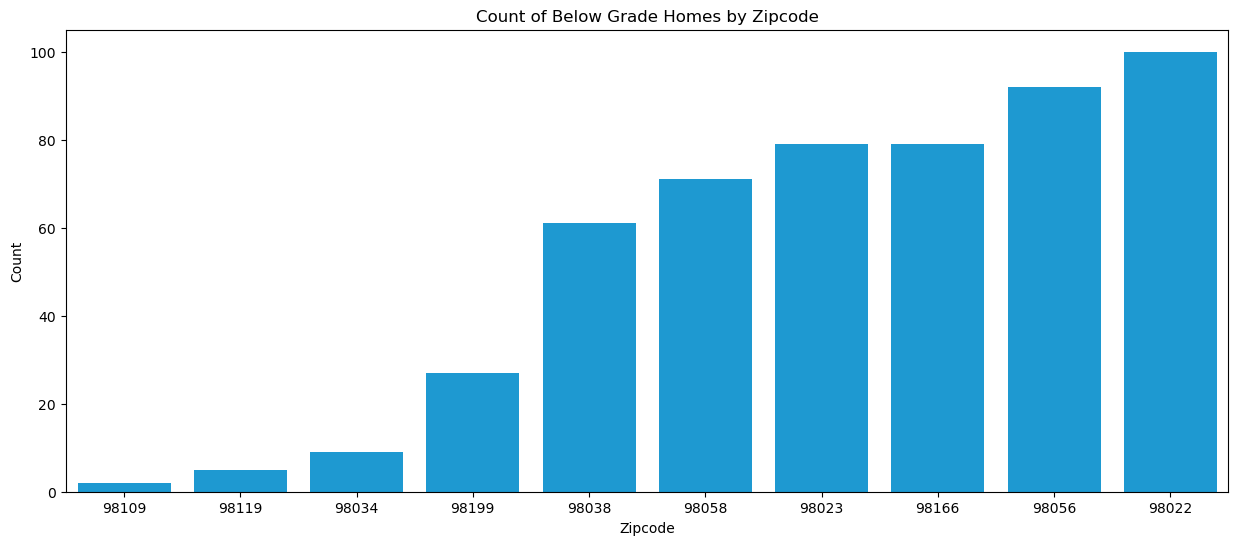

In [154]:
# bar chart of the zipcodes we found with most Low Average 
# below grades
fig, ax = plt.subplots(figsize=(15,6))

# bar chart
sns.barplot(data=df_filtered.groupby(by='zipcode').sum().reset_index()\
                .sort_values(by='grade_num'), 
            x='zipcode',
            y='grade_num', color='#00A4EF', ax=ax)

ax.set_xlabel("Zipcode")
ax.set_ylabel("Count")
ax.set_title("Count of Below Grade Homes by Zipcode")

# save plot as jpg
plt.savefig('./count_of_below_grade_home.jpg', bbox_inches='tight')

### Run these final zipcodes into our model

In [112]:
final_zipcodes

Index(['98038', '98056', '98058', '98022', '98166', '98199', '98023'], dtype='object')

In [106]:
# predicted prices for these zipcodes 
# 2100 sqft on average and grade of 6 Low Average
for zipcode in final_zipcodes:
    print(tuple([zipcode, house_price(2100, 0, zipcode, '6 Low Average', 'GOOD')]))

('98038', 815713.41)
('98056', 985193.8)
('98058', 786412.86)
('98022', 709698.76)
('98166', 864637.91)
('98199', 1314391.44)
('98023', 650415.93)


In [107]:
# predicted prices for these zipcodes 
# 2100 sqft on average and grade of 5 Fair
for zipcode in final_zipcodes:
    print(tuple([zipcode, house_price(2100, 0, zipcode, '5 Fair', 'GOOD')]))

('98038', 811298.53)
('98056', 980341.31)
('98058', 782078.1)
('98022', 705581.15)
('98166', 860092.37)
('98199', 1308785.63)
('98023', 646474.3)


## Recommendations

Based on our findings for the zipcodes they could be interested in, we have narrowed down 3 zipcodes that could be useful to them based on their budget and other business objectives.

The 3 zipcodes we recommend are 98023, 98022, and 98199.

    * For the 98023 zipcode, this would be a good option for a cheap home in an upcoming neighborhood outside of Seattle.
    
    * For the 98022 zipcode, this gives you scenic views of Mt. Rainier. The negative being this is outside of Seattle and             could limit the amount of people coming to see your model home.
    
    * For the 98199 zipcode, located in the heart of Seattle this is a prime location for gathering investors with views of           Elliot Bay and Seattle proper